URL deployment Heroku : `https://thu-four.herokuapp.com`

# Milestone 1

`By Shafira Laksitasari`

## Introduction

## Description
The United States Ministry of the Environment wants to make regulations regarding industrial and motor vehicle emissions which are now seriously damaging the air quality in the country. However, to make these regulations, it is necessary to know the current air quality conditions in various states so that it is easy to determine which states must apply these regulations first. 

### Objective
Use the epa_historical_air_quality dataset on Google Cloud Platform BigQuery. Then :
1. identify and describe the problem in order to carry out the analysis (SWOT, Fish bone diagram, 5W+1H). The questions/problems must be answered with data visualization and statistical analysis.
2. Describe the problem with the 5W+1H method.
3. Determine what metrics/data are required and then pull the required data from the predefined dataset using SQL. 
4. The description of the problem to be answered using data visualization and statistical analysis following the following criteria. There are at least 6 descriptions of the problem where :
- 4 descriptions are for data visualization
- 1 description for descriptive statistics
- 1 translation for inferential statistics.

5. Create minimum of 4 visualizations corresponds to the minimum number of descriptions for the data visualization section. MUST provide insight in each data visualization.
6. Descriptive Statistics, select at least one descriptive statistical calculation/analysis such as central tendency, measure of variance, outlier analysis, distribution, etc. Adjust to the description of the problem specified.
7. For Inferential Statistics, select at least one of the inferential statistical calculations/analysis such as confidence interval, statistical significance, statistical testing, hypothesis testing: one sample, two independent sample, paired test, ANOVA, chi-square, etc. Adjust to the description of the problem specified.
8. The output of this milestone is a data visualization dashboard using streamlit and analysis and data processing in notebooks.

### Problem Statement


Problem :
Finding out the current air quality conditions in various states of America

Problem Identification :
To find out the current air quality conditions in various states we must breakdown all the emission situation from the curren time. If today is January 2022, we will explore the data available for previous year. Based on U.S  the three most critical emission are Ozone (O3), Particulate Matter 10 (PM10), and Particulate Matter 2.5 (PM2.5). These three emissions need to be investigated further about their contribution to causing the air in the U.S. to be unhealthy. The U.S. has 51 states, each of which has different air conditions. Therefore, it is necessary to make regulations for several states whose air is already critical in the U.S. to anticipate air conditions that are considered unhealthy.


1. Can the data be processed without an anomalous data?
`As anticipation to reduce the skewness of the data so that the data will be easier to process statistically`
2. What are the current top three Air Quality Index (AQI) like in entire US for last 1 year? What are the average AQI per day wich make the US air condition in that situation ?
`Knowing the average AQI for each state will provide detailed emissions history as a form of documentation`
3. What is the AQI limit for determining high or low air emissions in the U.S.?
`Knowing the limits of an emission in the U.S. will later become a reference that for the size of the U.S. which state has high or low emissions`
4. Based on the AQI parameters, What are the AQI categories in each state for every month?
`By knowing the AQI category of the average of each AQI emission, we can see how the condition of the air is in that state`
5. Is there any significant difference of daily AQI average in January 2021 and December 2021 for each Air Emission in entire US?
`This significance test is to find out how severe the emission increase is going on`
6. Which are the most important emissions to notice at this time?
`By referring to the highest AQI scale we can give priority attention to these emissions`
7. Which state need the most regulation for now regarding the AQI average in each emission?
`In order to realize regulations regarding industrial and motor vehicle emissions which are now seriously damaging the air quality, we need to mark the state for further action.`

what metrics/data are required? 
Our main metrics is the Air Quality Index (AQI) of each emisisson for every day in the 2021.





Disclaimer :
- Some Data probably inaqurate
- Data started at middle year of 2021 until end of 2021 considering the capacity to save the data and the data in 2022 mostly unfinished.
- This is only for assignment.


## I. Data Loading & Queries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Query for Obtained the data (SQL)

SELECT state_name, date_local, AVG(aqi) as aqi_o3
FROM `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
WHERE
   date_local BETWEEN '2021-01-01' AND '2021-12-31'
GROUP BY state_name, date_local
ORDER BY date_local ASC

SELECT state_name, date_local, AVG(aqi) as aqi_pm10
FROM `bigquery-public-data.epa_historical_air_quality.pm10_daily_summary`
WHERE
   date_local BETWEEN '2021-01-01' AND '2021-12-31'
GROUP BY state_name, date_local
ORDER BY date_local ASC

SELECT state_name, date_local, AVG(aqi) as aqi_pm25
FROM `bigquery-public-data.epa_historical_air_quality.pm25_nonfrm_daily_summary`
WHERE
   date_local BETWEEN '2021-01-01' AND '2021-12-31'
GROUP BY state_name, date_local
ORDER BY date_local ASC


#### Data Loading for O3

In [196]:
o3 = pd.read_csv('csv/o3.csv')
o3

,state_name,date_local,aqi_o3
0,Alaska,2021-01-01,18.000000
1,Rhode Island,2021-01-01,27.000000
2,Ohio,2021-01-01,17.833333
3,Utah,2021-01-01,32.692308
4,Maine,2021-01-01,29.166667
...,...,...,...
18949,Maryland,2021-12-31,21.833333
18950,Michigan,2021-12-31,21.000000
18951,Louisiana,2021-12-31,23.227273
18952,Minnesota,2021-12-31,28.500000


#### Data Loading for pm10

In [197]:
pm10 = pd.read_csv('csv/pm10.csv')
pm10

,state_name,date_local,aqi_pm10
0,California,2021-01-01,14.559140
1,Arkansas,2021-01-01,3.000000
2,Iowa,2021-01-01,17.000000
3,Vermont,2021-01-01,3.000000
4,Alabama,2021-01-01,9.500000
...,...,...,...
16504,North Carolina,2021-12-31,10.666667
16505,Ohio,2021-12-31,17.363636
16506,South Carolina,2021-12-31,20.000000
16507,Washington,2021-12-31,7.833333


#### Data Loading for pm25

In [198]:
mv = ['NaN']
pm25 = pd.read_csv('csv/pm25.csv', na_values = mv)
pm25

,state_name,date_local,aqi_pm25
0,Alabama,2021-01-01,21.900000
1,Alaska,2021-01-01,81.875000
2,Arizona,2021-01-01,48.133333
3,Arkansas,2021-01-01,12.166667
4,California,2021-01-01,34.846154
...,...,...,...
10555,Texas,2021-12-31,49.000000
10556,Utah,2021-12-31,11.000000
10557,Virginia,2021-12-31,15.000000
10558,Washington,2021-12-31,25.975610


#### Data Loading for states

In [199]:
state = pd.read_csv('csv/state.csv')
state

,state,latitude,longitude,state_name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida


## II. Data Cleaning

#### Data Cleaning for O3

Adding state longitude and latitude to the O3 dataframe by merging the data frame.

In [200]:
# Merge the selected column only
o3 = o3.merge(state[['state_name','longitude']], on=['state_name'], how='inner')
o3 = o3.merge(state[['state_name','latitude']], on=['state_name'], how='inner')
# Reorder the column
o3 = o3[['state_name', 'date_local', 'longitude', 'latitude','aqi_o3']]
o3

,state_name,date_local,longitude,latitude,aqi_o3
0,Alaska,2021-01-01,-154.493062,63.588753,18.000000
1,Alaska,2021-01-02,-154.493062,63.588753,26.500000
2,Alaska,2021-01-03,-154.493062,63.588753,25.000000
3,Alaska,2021-01-04,-154.493062,63.588753,18.000000
4,Alaska,2021-01-05,-154.493062,63.588753,35.000000
...,...,...,...,...,...
18476,Massachusetts,2021-12-27,-71.382437,42.407211,19.722222
18477,Massachusetts,2021-12-28,-71.382437,42.407211,21.222222
18478,Massachusetts,2021-12-29,-71.382437,42.407211,16.055556
18479,Massachusetts,2021-12-30,-71.382437,42.407211,10.222222


Checking the data to get 'Non-Null Count' and 'Dtype'.

In [201]:
o3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18481 entries, 0 to 18480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  18481 non-null  object 
 1   date_local  18481 non-null  object 
 2   longitude   18481 non-null  float64
 3   latitude    18481 non-null  float64
 4   aqi_o3      18481 non-null  float64
dtypes: float64(3), object(2)
memory usage: 866.3+ KB


No Null detected but the 'date_local' type is not matching. Proceed to change the data type from 'object' to 'datetime'.

In [202]:
o3.date_local = pd.to_datetime(o3.date_local)

In [203]:
o3

,state_name,date_local,longitude,latitude,aqi_o3
0,Alaska,2021-01-01,-154.493062,63.588753,18.000000
1,Alaska,2021-01-02,-154.493062,63.588753,26.500000
2,Alaska,2021-01-03,-154.493062,63.588753,25.000000
3,Alaska,2021-01-04,-154.493062,63.588753,18.000000
4,Alaska,2021-01-05,-154.493062,63.588753,35.000000
...,...,...,...,...,...
18476,Massachusetts,2021-12-27,-71.382437,42.407211,19.722222
18477,Massachusetts,2021-12-28,-71.382437,42.407211,21.222222
18478,Massachusetts,2021-12-29,-71.382437,42.407211,16.055556
18479,Massachusetts,2021-12-30,-71.382437,42.407211,10.222222


Check again the to confirm the change.

In [204]:
o3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18481 entries, 0 to 18480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state_name  18481 non-null  object        
 1   date_local  18481 non-null  datetime64[ns]
 2   longitude   18481 non-null  float64       
 3   latitude    18481 non-null  float64       
 4   aqi_o3      18481 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 866.3+ KB


#### Data Cleaning for pm10

Doing similiar step of data cleaning with previous query.

In [205]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  16509 non-null  object 
 1   date_local  16509 non-null  object 
 2   aqi_pm10    16509 non-null  float64
dtypes: float64(1), object(2)
memory usage: 387.1+ KB


In [206]:
# Merge the selected column only
pm10 = pm10.merge(state[['state_name','longitude']], on=['state_name'], how='inner')
pm10 = pm10.merge(state[['state_name','latitude']], on=['state_name'], how='inner')
# Reorder the column
pm10 = pm10[['state_name', 'date_local', 'longitude', 'latitude','aqi_pm10']]
pm10.date_local = pd.to_datetime(pm10.date_local)
pm10


,state_name,date_local,longitude,latitude,aqi_pm10
0,California,2021-01-01,-119.417932,36.778261,14.559140
1,California,2021-01-02,-119.417932,36.778261,16.406977
2,California,2021-01-03,-119.417932,36.778261,17.083333
3,California,2021-01-04,-119.417932,36.778261,17.835937
4,California,2021-01-05,-119.417932,36.778261,15.988235
...,...,...,...,...,...
16148,Texas,2021-12-12,-99.901813,31.968599,17.190476
16149,Texas,2021-12-16,-99.901813,31.968599,47.000000
16150,Texas,2021-12-18,-99.901813,31.968599,16.052632
16151,Texas,2021-12-24,-99.901813,31.968599,26.409091


In [207]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153 entries, 0 to 16152
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state_name  16153 non-null  object        
 1   date_local  16153 non-null  datetime64[ns]
 2   longitude   16153 non-null  float64       
 3   latitude    16153 non-null  float64       
 4   aqi_pm10    16153 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 757.2+ KB


#### Data Cleaning for pm25

Doing similiar step of data cleaning with previous query.

In [208]:
pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  10560 non-null  object 
 1   date_local  10560 non-null  object 
 2   aqi_pm25    10511 non-null  float64
dtypes: float64(1), object(2)
memory usage: 247.6+ KB


In [209]:
# Merge the selected column only
pm25 = pm25.merge(state[['state_name','longitude']], on=['state_name'], how='inner')
pm25 = pm25.merge(state[['state_name','latitude']], on=['state_name'], how='inner')
# Reorder the column
pm25 = pm25[['state_name', 'date_local', 'longitude', 'latitude','aqi_pm25']]
pm25.date_local = pd.to_datetime(pm25.date_local)
pm25


,state_name,date_local,longitude,latitude,aqi_pm25
0,Alabama,2021-01-01,-86.902298,32.318231,21.900000
1,Alabama,2021-01-02,-86.902298,32.318231,30.250000
2,Alabama,2021-01-03,-86.902298,32.318231,30.625000
3,Alabama,2021-01-04,-86.902298,32.318231,41.600000
4,Alabama,2021-01-05,-86.902298,32.318231,41.125000
...,...,...,...,...,...
10449,Wyoming,2021-05-19,-107.290284,43.075968,13.666667
10450,Wyoming,2021-05-22,-107.290284,43.075968,8.250000
10451,Wyoming,2021-05-25,-107.290284,43.075968,5.666667
10452,Wyoming,2021-05-28,-107.290284,43.075968,9.000000


Dorp the row with null values.

In [210]:
pm25 = pm25.dropna(axis=0)

In [211]:
pm25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10405 entries, 0 to 10453
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state_name  10405 non-null  object        
 1   date_local  10405 non-null  datetime64[ns]
 2   longitude   10405 non-null  float64       
 3   latitude    10405 non-null  float64       
 4   aqi_pm25    10405 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 487.7+ KB


In [212]:
# pm25[(pm25['state_name'] == 'Colorado') & (pm25['date_local'] == '2021-07-15')]


## III. Analysis and computation

### 1. Can the data be processed without an anomalous data?

To getting rid the anomalous data, delete the outlier in each emission table.

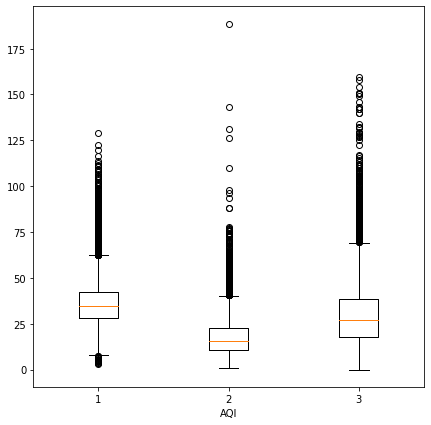

In [213]:
plt.rcParams["figure.figsize"] = (7,7)
plt.boxplot([o3['aqi_o3'], pm10['aqi_pm10'], pm25['aqi_pm25']], vert=True)
plt.xlabel('AQI')
plt.show()

Highest AQI at O3

Inspect the skewness from current graph.

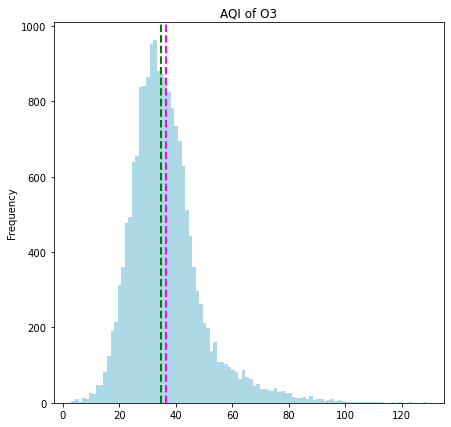

In [214]:
o3_aqi = o3['aqi_o3']
o3_aqi.plot.hist(title='AQI of O3', color='lightblue', bins=100) #there are 100 grouping 
plt.axvline(o3_aqi.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(o3_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Compute the skewness of O3 data.

In [215]:
print('Skewness: ' + str(o3_aqi.skew()))
print('Kurtosis: ' + str(o3_aqi.kurt()))

Skewness: 1.3979136182741614
Kurtosis: 3.82014810414416


Determine the IQR, Upper Boundaries, and Lower Boundaries of O3.

In [216]:
o3_q3, o3_q1 = np.percentile(o3['aqi_o3'], [75 ,25])
o3_iqr = o3_q3 - o3_q1
max_o3_iqr = o3_q3 + 1.5 * o3_iqr
min_o3_iqr = o3_q1 - 1.5 * o3_iqr

print('The O3 IQR is : ', o3_iqr)
print('The Upper Boundaries : ', max_o3_iqr)
print('The Lower Boundaries : ', min_o3_iqr)

The O3 IQR is :  13.718309859154921
The Upper Boundaries :  62.577464788732385
The Lower Boundaries :  7.704225352112697


There are discrepancy occured such as outlier. what should be done is getting rid those outliers in each emission by inspect the skewness and computed the Inter Quartile Range or Standard Deviation.

Drop the data with contain AQI value more than or less than boundaries.

In [217]:
o3.drop(o3[o3['aqi_o3'] > max_o3_iqr].index, inplace = True)
o3.drop(o3[o3['aqi_o3'] < min_o3_iqr].index, inplace = True)

Now there is no extreme outlier in 03.

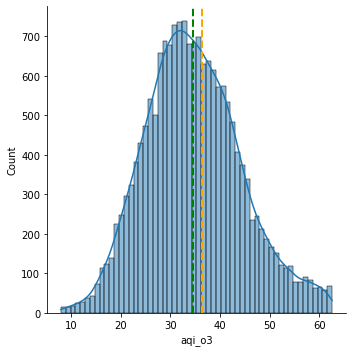

In [218]:
sns.displot(o3['aqi_o3'], kde=True, label='Standard deviation on the Data')
plt.axvline(o3_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(o3_aqi.median(), color='green', linestyle='dashed', linewidth=2)

Highest AQI at PM10

Inspect the skewness from current graph.

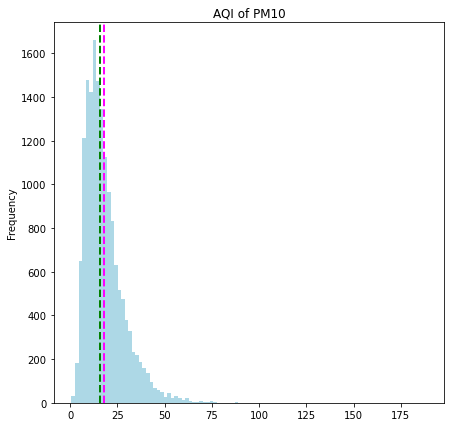

In [219]:
pm10_aqi = pm10['aqi_pm10']
pm10_aqi.plot.hist(title='AQI of PM10', color='lightblue', bins=100) #there are 100 grouping 
plt.axvline(pm10_aqi.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pm10_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Compute the skewness of PM10 data.

In [220]:
print('Skewness: ' + str(pm10_aqi.skew()))
print('Kurtosis: ' + str(pm10_aqi.kurt()))

Skewness: 1.9861040814001139
Kurtosis: 10.479481695459086


Determine the IQR, Upper Boundaries, and Lower Boundaries of PM10.

In [221]:
pm10_q3, pm10_q1 = np.percentile(pm10['aqi_pm10'], [75 ,25])
pm10_iqr = pm10_q3 - pm10_q1
max_pm10_iqr = pm10_q3 + 1.5 * pm10_iqr
min_pm10_iqr = pm10_q1 - 1.5 * pm10_iqr

print('The PM10 IQR is : ', pm10_iqr)
print('The Upper Boundaries : ', max_pm10_iqr)

The PM10 IQR is :  11.850000000000001
The Upper Boundaries :  40.375


Drop the data with contain AQI value more than or less than boundaries.

In [222]:
pm10.drop(pm10[pm10['aqi_pm10'] > max_pm10_iqr].index, inplace = True)

Now there is no extreme outlier in PM10.

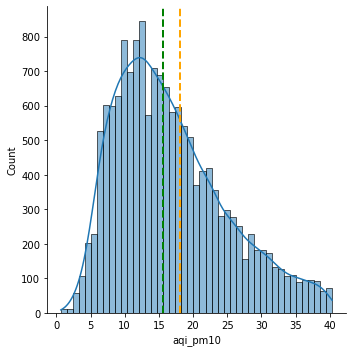

In [223]:
sns.displot(pm10['aqi_pm10'], kde=True, label='Standard deviation on the Data')
plt.axvline(pm10_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(pm10_aqi.median(), color='green', linestyle='dashed', linewidth=2)

Highest AQI at PM2.5

Inspect the skewness from current graph.

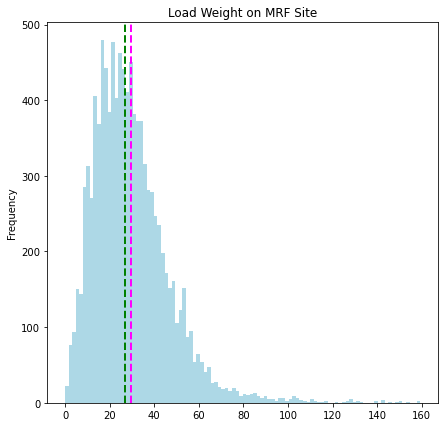

In [224]:
pm25_aqi = pm25['aqi_pm25']
pm25_aqi.plot.hist(title='Load Weight on MRF Site', color='lightblue', bins=100) #there are 250 grouping 
plt.axvline(pm25_aqi.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pm25_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Compute the skewness of PM2.5 data.

In [225]:
print('Skewness: ' + str(pm25_aqi.skew()))
print('Kurtosis: ' + str(pm25_aqi.kurt()))

Skewness: 1.6199690941625549
Kurtosis: 5.588558880806584


Determine the IQR, Upper Boundaries, and Lower Boundaries of PM2.5.

In [226]:
pm25_q3, pm25_q1 = np.percentile(pm25['aqi_pm25'], [75 ,25])
pm25_iqr = pm25_q3 - pm25_q1
max_pm25_iqr = pm25_q3 + 1.5 * pm25_iqr
min_pm25_iqr = pm25_q1 - 1.5 * pm25_iqr

print('The PM25 IQR is : ', pm25_iqr)
print('The Upper Boundaries : ', max_pm25_iqr)

The PM25 IQR is :  20.75
The Upper Boundaries :  69.375


Drop the data with contain AQI value more than or less than boundaries.

In [227]:
pm25.drop(pm25[pm25['aqi_pm25'] > max_pm25_iqr].index, inplace = True)

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_13705/3592074176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25.drop(pm25[pm25['aqi_pm25'] > max_pm25_iqr].index, inplace = True)


Now there is no extreme outlier in PM2.5.

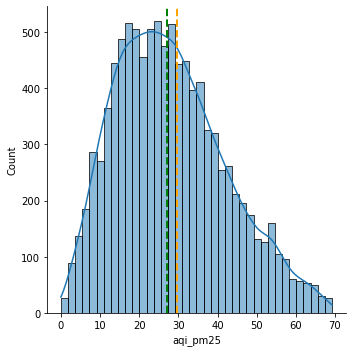

In [228]:
sns.displot(pm25['aqi_pm25'], kde=True, label='Standard deviation on the Data')
plt.axvline(pm25_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(pm25_aqi.median(), color='green', linestyle='dashed', linewidth=2)

Check again the boxplot without outlier.

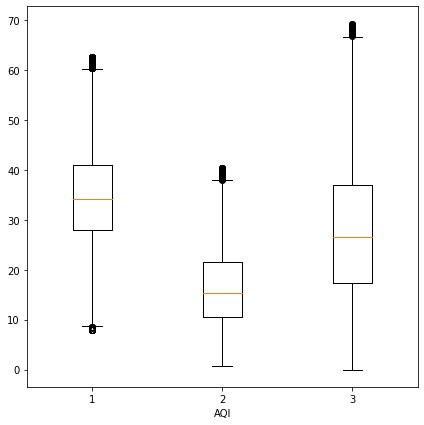

In [229]:
plt.rcParams["figure.figsize"] = (7,7)
plt.boxplot([o3['aqi_o3'], pm10['aqi_pm10'], pm25['aqi_pm25']], vert=True)
plt.xlabel('AQI')
plt.show()

There are no more extreme outlier or anomaly data of the three of emissions. 

### 2. What are the current top three Air Quality Index (AQI) like in entire US for last 1 year? What are the average AQI per day wich make the US air condition in that situation ?

The three most critical Air emission is Ozone (O3), Particulate Matter 10 and 2.5. To know what is the the current condition situation we can see from Air Quality Index value (AQI). Right now based on the figure below O3 used to be the highest AQI and competing with PM2.5 while PM10 most time always at bottom.

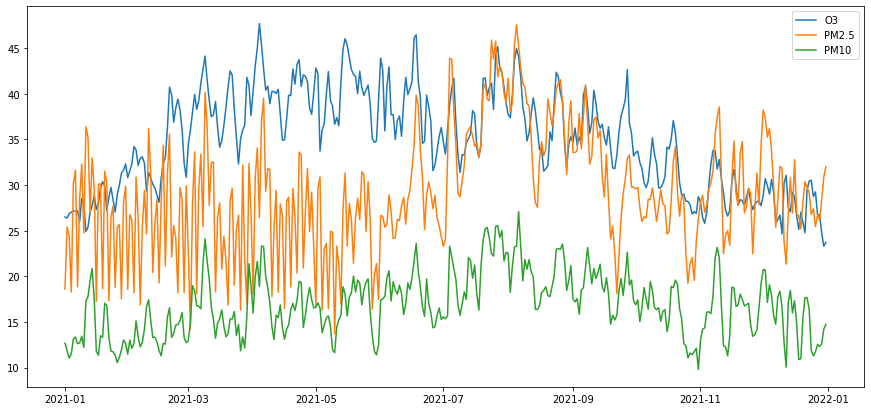

In [230]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(o3.groupby(by='date_local')['aqi_o3'].mean(), label = "O3")
plt.plot(pm25.groupby(by='date_local')['aqi_pm25'].mean(), label = "PM2.5")
plt.plot(pm10.groupby(by='date_local')['aqi_pm10'].mean(), label = "PM10")
plt.legend()
plt.show()

While answering the average AQI of all states everyday in each day for last 1 year, can be seen from each of the table below.

In [231]:
o3

,state_name,date_local,longitude,latitude,aqi_o3
0,Alaska,2021-01-01,-154.493062,63.588753,18.000000
1,Alaska,2021-01-02,-154.493062,63.588753,26.500000
2,Alaska,2021-01-03,-154.493062,63.588753,25.000000
3,Alaska,2021-01-04,-154.493062,63.588753,18.000000
4,Alaska,2021-01-05,-154.493062,63.588753,35.000000
...,...,...,...,...,...
18476,Massachusetts,2021-12-27,-71.382437,42.407211,19.722222
18477,Massachusetts,2021-12-28,-71.382437,42.407211,21.222222
18478,Massachusetts,2021-12-29,-71.382437,42.407211,16.055556
18479,Massachusetts,2021-12-30,-71.382437,42.407211,10.222222


'aqi_o3' above showing th average daily AQI of O3 for each state fom 1st January 2021 until 31st December 2021

In [232]:
pm25

,state_name,date_local,longitude,latitude,aqi_pm25
0,Alabama,2021-01-01,-86.902298,32.318231,21.900000
1,Alabama,2021-01-02,-86.902298,32.318231,30.250000
2,Alabama,2021-01-03,-86.902298,32.318231,30.625000
3,Alabama,2021-01-04,-86.902298,32.318231,41.600000
4,Alabama,2021-01-05,-86.902298,32.318231,41.125000
...,...,...,...,...,...
10449,Wyoming,2021-05-19,-107.290284,43.075968,13.666667
10450,Wyoming,2021-05-22,-107.290284,43.075968,8.250000
10451,Wyoming,2021-05-25,-107.290284,43.075968,5.666667
10452,Wyoming,2021-05-28,-107.290284,43.075968,9.000000


'aqi_pm25' above  also showing the average daily AQI of PM2.5 for each state fom 1st January 2021 until 31st December 2021.

In [233]:
pm10

,state_name,date_local,longitude,latitude,aqi_pm10
0,California,2021-01-01,-119.417932,36.778261,14.559140
1,California,2021-01-02,-119.417932,36.778261,16.406977
2,California,2021-01-03,-119.417932,36.778261,17.083333
3,California,2021-01-04,-119.417932,36.778261,17.835937
4,California,2021-01-05,-119.417932,36.778261,15.988235
...,...,...,...,...,...
16147,Texas,2021-12-09,-99.901813,31.968599,38.500000
16148,Texas,2021-12-12,-99.901813,31.968599,17.190476
16150,Texas,2021-12-18,-99.901813,31.968599,16.052632
16151,Texas,2021-12-24,-99.901813,31.968599,26.409091


At last, 'aqi_pm10' above showing the average daily AQI of PM2.5 for each state fom 1st January 2021 until 31st December 2021.

Three of tables above are detail from the previous graph. Or clue for now is Based on observation, O3 could be more or similiar with PM2.5 while PM10 rarely compete with both of air emissions.

Note : Some of the days, weeks, and months in certain state are skipped based on several factors. So that is the reason not all AQI are entered in the datas.

### 3. What is the AQI limit for determining high, medium,or low air emissions in the U.S.?

We can determine the high or low air emissions in the U.S with central Tendency. See the graph below.

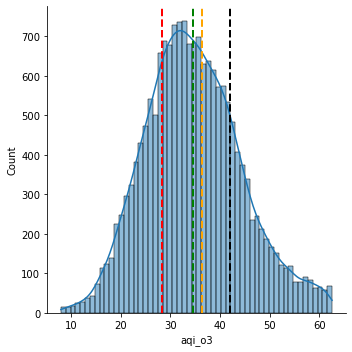

In [234]:
sns.displot(o3['aqi_o3'], kde=True, label='Standard deviation on the Data')
plt.axvline(o3_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(o3_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(o3_q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(o3_q3, color='black', linestyle='dashed', linewidth=2)

In here we will determining the low, medium, and high AQI in the US for 03 based on Quartile.

In [235]:
print('- The O3 consider Low in US if the O3 less than ',o3_q1)
print('- The O3 consider medium in US if the O3 in between ',o3_q1,' and ', o3_q3)
print('- The O3 consider High in US if the O3 more than ',o3_q3)


- The O3 consider Low in US if the O3 less than  28.28169014084508
- The O3 consider medium in US if the O3 in between  28.28169014084508  and  42.0
- The O3 consider High in US if the O3 more than  42.0


Then do the same process with PM10 and PM2.5

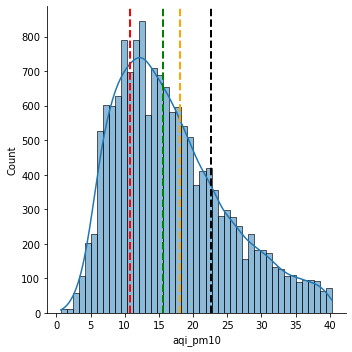

In [236]:
sns.displot(pm10['aqi_pm10'], kde=True, label='Standard deviation on the Data')
plt.axvline(pm10_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(pm10_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(pm10_q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(pm10_q3, color='black', linestyle='dashed', linewidth=2)

In [237]:
print('- The PM10 consider Low in US if the PM10 less than ',pm10_q1)
print('- The PM10 consider medium in US if the PM10 in between ',pm10_q1,' and ', pm10_q3)
print('- The PM10 consider High in US if the PM10 more than ',pm10_q3)

- The PM10 consider Low in US if the PM10 less than  10.75
- The PM10 consider medium in US if the PM10 in between  10.75  and  22.6
- The PM10 consider High in US if the PM10 more than  22.6


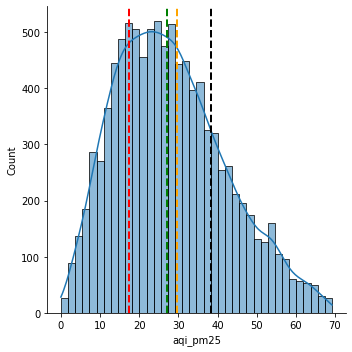

In [238]:
sns.displot(pm25['aqi_pm25'], kde=True, label='Standard deviation on the Data')
plt.axvline(pm25_aqi.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(pm25_aqi.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(pm25_q1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(pm25_q3, color='black', linestyle='dashed', linewidth=2)

In [239]:
print('- The PM2.5 consider Low in US if the PM2.5 less than ',pm25_q1)
print('- The PM2.5 consider medium in US if the PM2.5 in between ',pm25_q1,' and ', pm25_q3)
print('- The PM2.5 consider High in US if the PM2.5 more than ',pm25_q3)

- The PM2.5 consider Low in US if the PM2.5 less than  17.5
- The PM2.5 consider medium in US if the PM2.5 in between  17.5  and  38.25
- The PM2.5 consider High in US if the PM2.5 more than  38.25


So in conclusion to determine the low, median, or high AQI in each emission :
O3 (Ozone)
- Low : O3 < 28.28169014084508
- Medium :  28.28169014084508 <= O3 <= 42.0
- High : O3 > 42.0

PM10 (Particulate Matter 10)
- Low :  PM10 < 10.75
- Medium : 10.75 <= O3 <=  22.6
- High : PM10 > 22.6

PM2/5 (Particulate Matter 2.5)
- Low :  PM2.5 < 17.5
- Medium : 17.5 <= PM2.5 <=  38.25
- High : PM2.5 >  38.25

### 4. Based on the AQI parameters given for current situation, What are the AQI categories in each state for every month?

This Parameter will give us the indicator whether the current AQI is bad or vice versa. We will give each of the AQI in every state 'Level of Health Concern (Category)' at every months.

First, create the table of AQI average for each month in every state. Starter by divide the 'date_local' in each emission into 'week','month',and 'year'.

In [240]:
o3['week'] = pd.to_datetime(o3['date_local']).dt.isocalendar().week 
o3['month'] = pd.to_datetime(o3['date_local']).dt.month
o3['year'] = pd.to_datetime(o3['date_local']).dt.year

pm10['week'] = pd.to_datetime(pm10['date_local']).dt.isocalendar().week 
pm10['month'] = pd.to_datetime(pm10['date_local']).dt.month
pm10['year'] = pd.to_datetime(pm10['date_local']).dt.year

pm25['week'] = pd.to_datetime(pm25['date_local']).dt.isocalendar().week 
pm25['month'] = pd.to_datetime(pm25['date_local']).dt.month
pm25['year'] = pd.to_datetime(pm25['date_local']).dt.year


/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_13705/1863342558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25['week'] = pd.to_datetime(pm25['date_local']).dt.isocalendar().week
/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_13705/1863342558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25['month'] = pd.to_datetime(pm25['date_local']).dt.month
/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_13705/1863342558.py:11: SettingWithCopyWarning: 
A value is tryi

Calculate the AQI of 03 every month on every state.

In [241]:
o3_mean_monthly = o3.groupby(['state_name','year','month'], as_index=False).mean()
o3_mean_monthly = o3_mean_monthly.drop(['week'], axis=1)
o3_mean_monthly


,state_name,year,month,longitude,latitude,aqi_o3
0,Alabama,2021,1,-86.902298,32.318231,28.467742
1,Alabama,2021,2,-86.902298,32.318231,32.312500
2,Alabama,2021,3,-86.902298,32.318231,37.085459
3,Alabama,2021,4,-86.902298,32.318231,43.252719
4,Alabama,2021,5,-86.902298,32.318231,40.731901
...,...,...,...,...,...,...
604,Wyoming,2021,8,-107.290284,43.075968,52.236905
605,Wyoming,2021,9,-107.290284,43.075968,46.861987
606,Wyoming,2021,10,-107.290284,43.075968,36.228065
607,Wyoming,2021,11,-107.290284,43.075968,33.737726


And similiar process to PM10.

In [242]:
pm10_mean_monthly = pm10.groupby(['state_name','year','month'], as_index=False).mean()
pm10_mean_monthly = pm10_mean_monthly.drop(['week'], axis=1)
pm10_mean_monthly


,state_name,year,month,longitude,latitude,aqi_pm10
0,Alabama,2021,1,-86.902298,32.318231,14.527100
1,Alabama,2021,2,-86.902298,32.318231,14.888017
2,Alabama,2021,3,-86.902298,32.318231,17.295059
3,Alabama,2021,4,-86.902298,32.318231,20.526014
4,Alabama,2021,5,-86.902298,32.318231,16.081036
...,...,...,...,...,...,...
595,Wyoming,2021,8,-107.290284,43.075968,27.501511
596,Wyoming,2021,9,-107.290284,43.075968,22.593238
597,Wyoming,2021,10,-107.290284,43.075968,10.669111
598,Wyoming,2021,11,-107.290284,43.075968,11.484727


Alsond similiar process to PM2.5.

In [243]:
pm25_mean_monthly = pm25.groupby(['state_name','year','month'], as_index=False).mean()
pm25_mean_monthly = pm25_mean_monthly.drop(['week'], axis=1)
pm25_mean_monthly


,state_name,year,month,longitude,latitude,aqi_pm25
0,Alabama,2021,1,-86.902298,32.318231,35.196710
1,Alabama,2021,2,-86.902298,32.318231,36.946103
2,Alabama,2021,3,-86.902298,32.318231,38.800000
3,Alabama,2021,4,-86.902298,32.318231,41.806918
4,Alabama,2021,5,-86.902298,32.318231,38.530876
...,...,...,...,...,...,...
418,Wyoming,2021,1,-107.290284,43.075968,2.840909
419,Wyoming,2021,2,-107.290284,43.075968,3.407407
420,Wyoming,2021,3,-107.290284,43.075968,6.116667
421,Wyoming,2021,4,-107.290284,43.075968,8.991667


On the AQI parameter above, next we can define the category of AQI for each period. Next step is create the def to define the category for each score range.

In [244]:
def category(score) :
    if score < 11:
        return 'Good'
    elif score < 31:
        return 'Moderate'
    elif score < 51:
        return 'Unhealthy for Specific Group'
    elif score < 71:
        return 'Unhealthy'
    elif score < 91:
        return 'Very Unhealthy'
    elif score > 100:
        return 'Hazardous'
    else:
        '-'

# def category(score) :
#     if score < 51:
#         return 'Good'
#     elif score < 101:
#         return 'Moderate'
#     elif score < 151:
#         return 'Unhealthy for Specific Group'
#     elif score < 201:
#         return 'Unhealthy'
#     elif score < 301:
#         return 'Very Unhealthy'
#     elif score < 500:
#         return 'Hazardous'
#     else:
#         '-'

Note : This Parameter is not real.

With 'for' query put the score category function to all emission : O3, PM10, PM2.5. See the next process along with the plot of AQI category in every month for each state in each emission.

#### O3 AQI Monthly Categories 

In [245]:
o3_aqi_category = []
for em in range(len(o3_mean_monthly )):
    o3_category_scan = category(o3_mean_monthly.loc[em,'aqi_o3'])
    o3_aqi_category.append(o3_category_scan)

o3_mean_monthly ['aqi_o3_category'] = o3_aqi_category


In [246]:
o3_mean_monthly

,state_name,year,month,longitude,latitude,aqi_o3,aqi_o3_category
0,Alabama,2021,1,-86.902298,32.318231,28.467742,Moderate
1,Alabama,2021,2,-86.902298,32.318231,32.312500,Unhealthy for Specific Group
2,Alabama,2021,3,-86.902298,32.318231,37.085459,Unhealthy for Specific Group
3,Alabama,2021,4,-86.902298,32.318231,43.252719,Unhealthy for Specific Group
4,Alabama,2021,5,-86.902298,32.318231,40.731901,Unhealthy for Specific Group
...,...,...,...,...,...,...,...
604,Wyoming,2021,8,-107.290284,43.075968,52.236905,Unhealthy
605,Wyoming,2021,9,-107.290284,43.075968,46.861987,Unhealthy for Specific Group
606,Wyoming,2021,10,-107.290284,43.075968,36.228065,Unhealthy for Specific Group
607,Wyoming,2021,11,-107.290284,43.075968,33.737726,Unhealthy for Specific Group


Result for AQI category for O3 are at 'aqi_o3_category' column. Next, see the plotting of each state for each month one by one.

Note : I can not find U.S geographical coordinate to support the graph.

AQI map for Ozone (O3) by month : 1


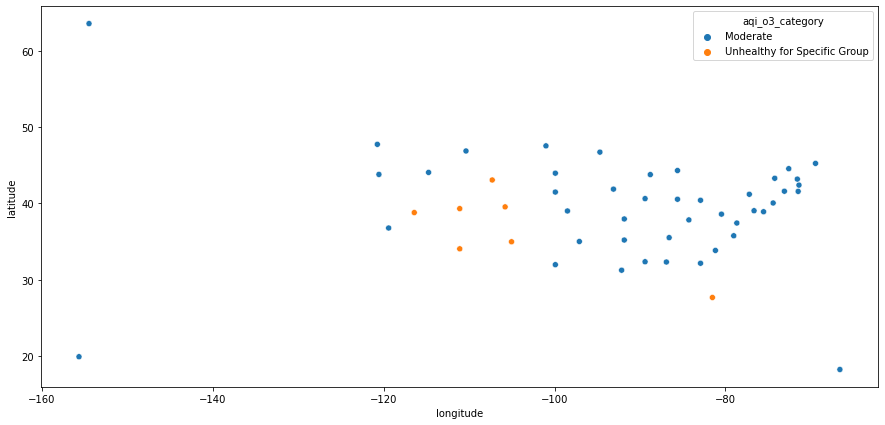



AQI map for Ozone (O3) by month : 2


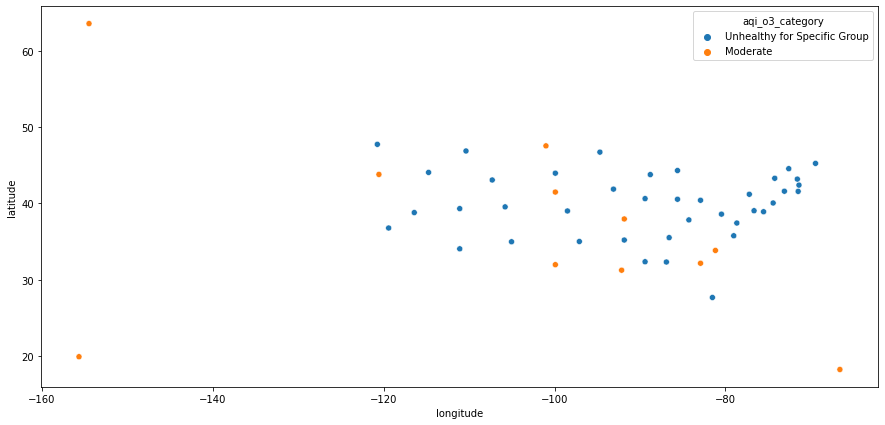



AQI map for Ozone (O3) by month : 3


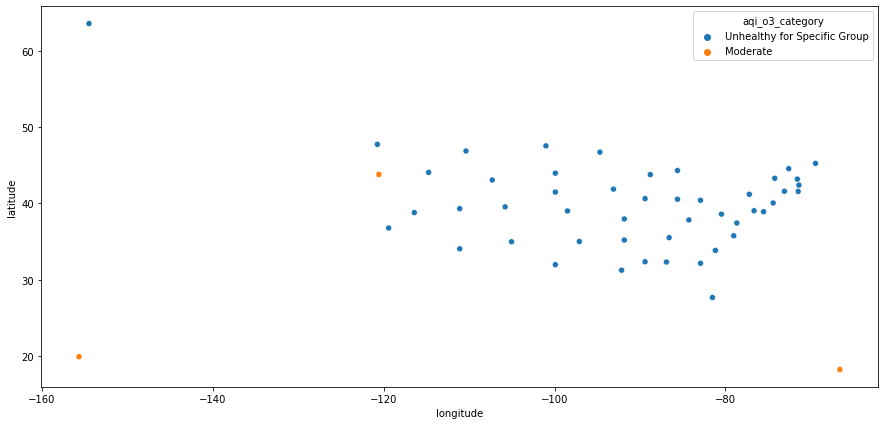



AQI map for Ozone (O3) by month : 4


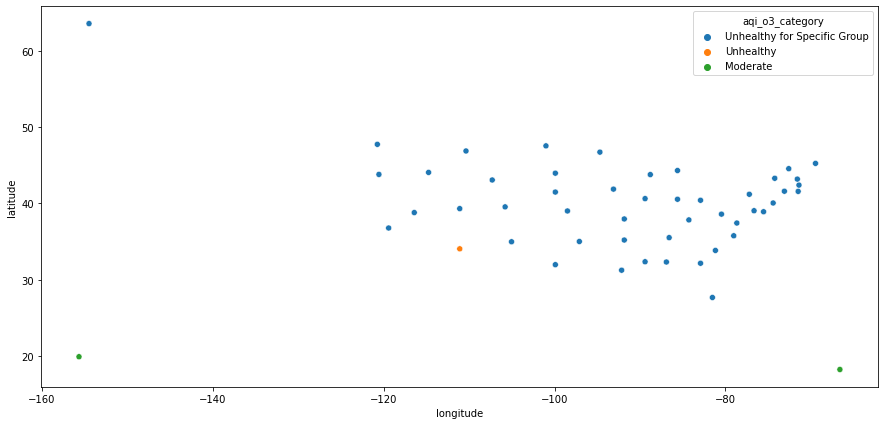



AQI map for Ozone (O3) by month : 5


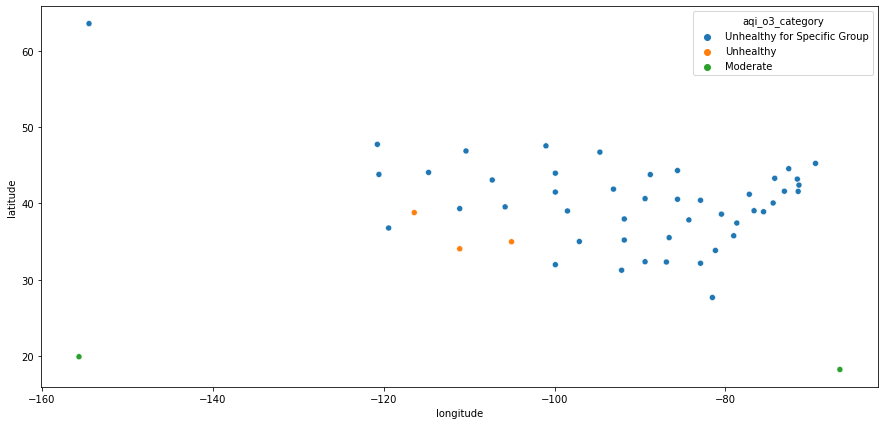



AQI map for Ozone (O3) by month : 6


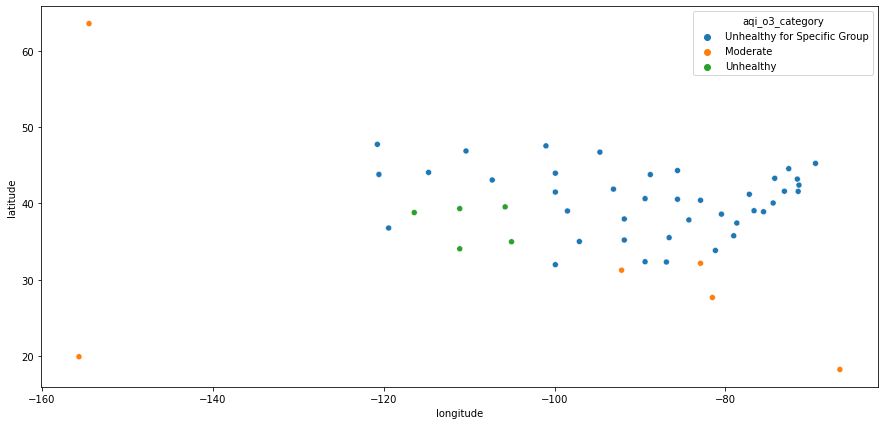



AQI map for Ozone (O3) by month : 7


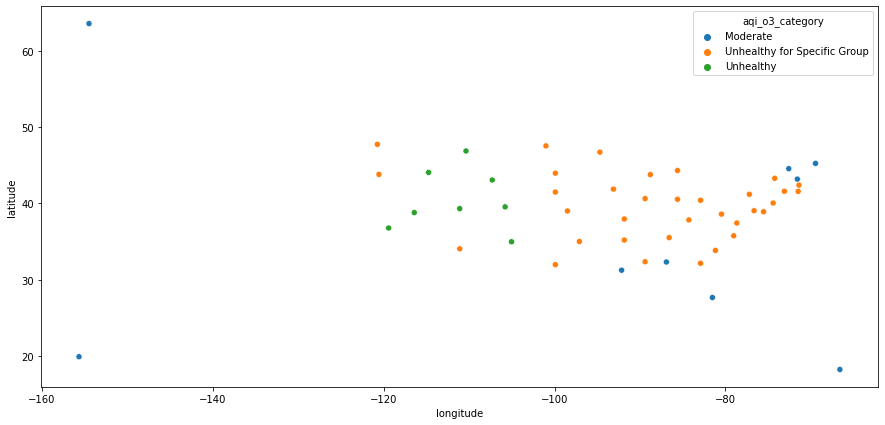



AQI map for Ozone (O3) by month : 8


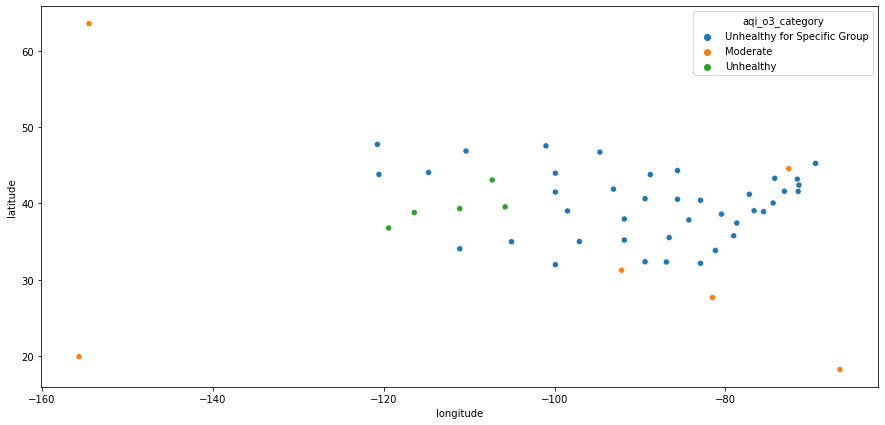



AQI map for Ozone (O3) by month : 9


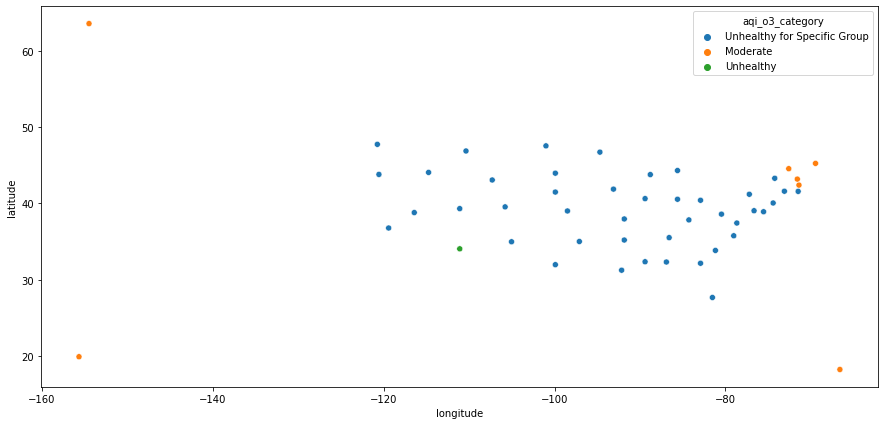



AQI map for Ozone (O3) by month : 10


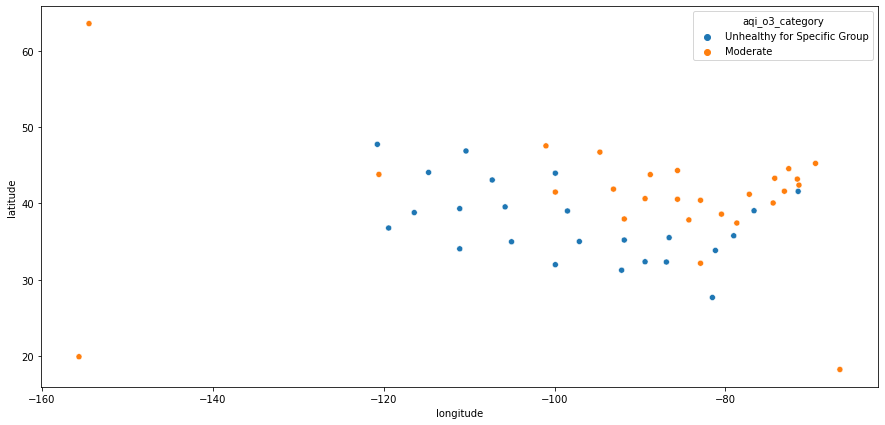



AQI map for Ozone (O3) by month : 11


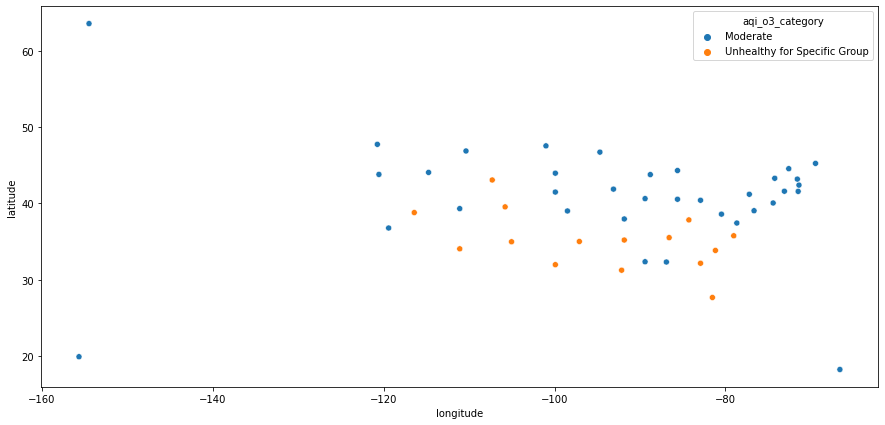



AQI map for Ozone (O3) by month : 12


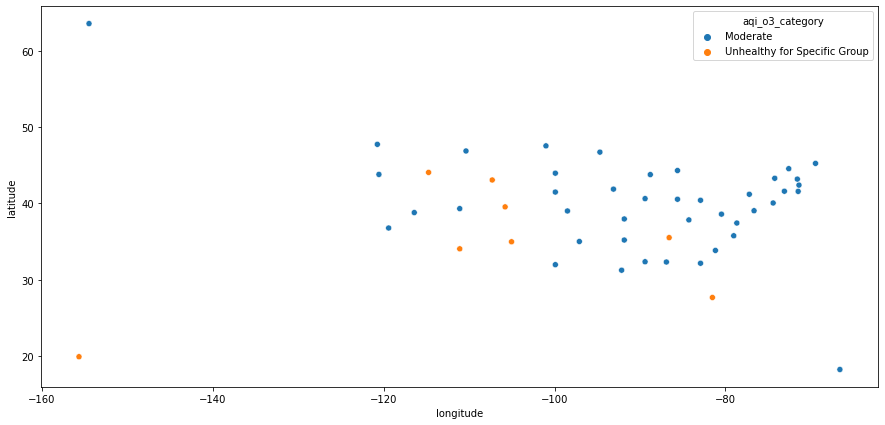

In [247]:

col = 1
while col <= 12:
    print(f'AQI map for Ozone (O3) by month : {col}')
    sns.scatterplot(data=o3_mean_monthly[(o3_mean_monthly['month'] == col)],x='longitude',y='latitude',hue='aqi_o3_category')
    plt.show()
    print('\n')
    col = col+1

#### PM10 AQI Monthly Categories 

In [248]:
pm10_aqi_category = []
for em in range(len(pm10_mean_monthly )):
    pm10_category_scan = category(pm10_mean_monthly .loc[em,'aqi_pm10'])
    pm10_aqi_category.append(pm10_category_scan)

pm10_mean_monthly ['aqi_pm10_category'] = pm10_aqi_category


In [249]:
pm10_mean_monthly

,state_name,year,month,longitude,latitude,aqi_pm10,aqi_pm10_category
0,Alabama,2021,1,-86.902298,32.318231,14.527100,Moderate
1,Alabama,2021,2,-86.902298,32.318231,14.888017,Moderate
2,Alabama,2021,3,-86.902298,32.318231,17.295059,Moderate
3,Alabama,2021,4,-86.902298,32.318231,20.526014,Moderate
4,Alabama,2021,5,-86.902298,32.318231,16.081036,Moderate
...,...,...,...,...,...,...,...
595,Wyoming,2021,8,-107.290284,43.075968,27.501511,Moderate
596,Wyoming,2021,9,-107.290284,43.075968,22.593238,Moderate
597,Wyoming,2021,10,-107.290284,43.075968,10.669111,Good
598,Wyoming,2021,11,-107.290284,43.075968,11.484727,Moderate


Result for AQI category for PM10 are at 'aqi_pm10_category' column. See the plotting of each state for each month below.

AQI map for Particulate Matter 10 (PM10) by month : 1


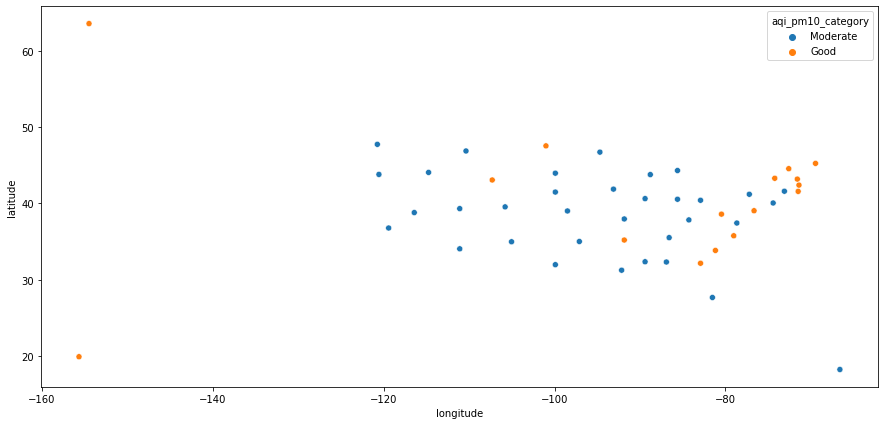



AQI map for Particulate Matter 10 (PM10) by month : 2


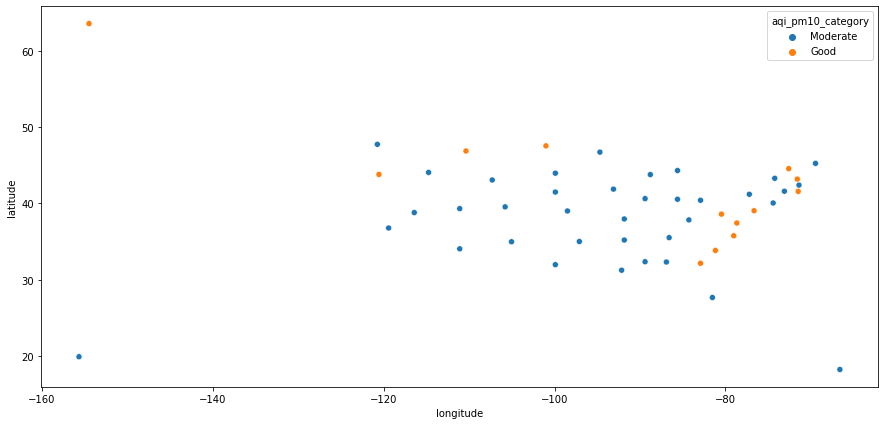



AQI map for Particulate Matter 10 (PM10) by month : 3


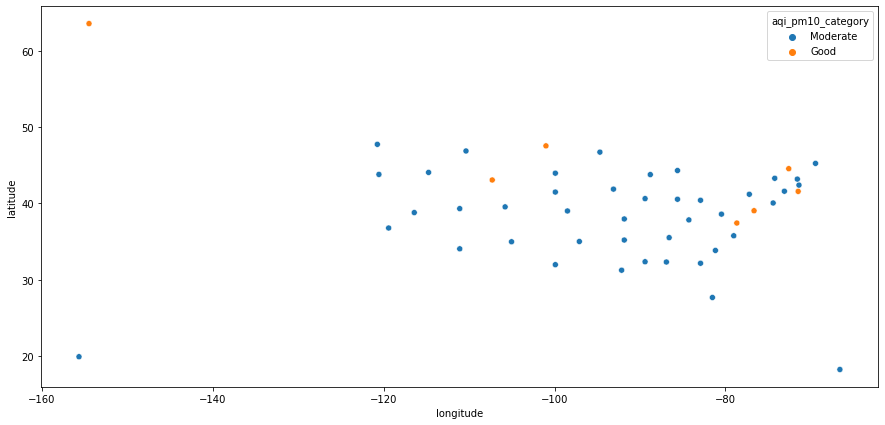



AQI map for Particulate Matter 10 (PM10) by month : 4


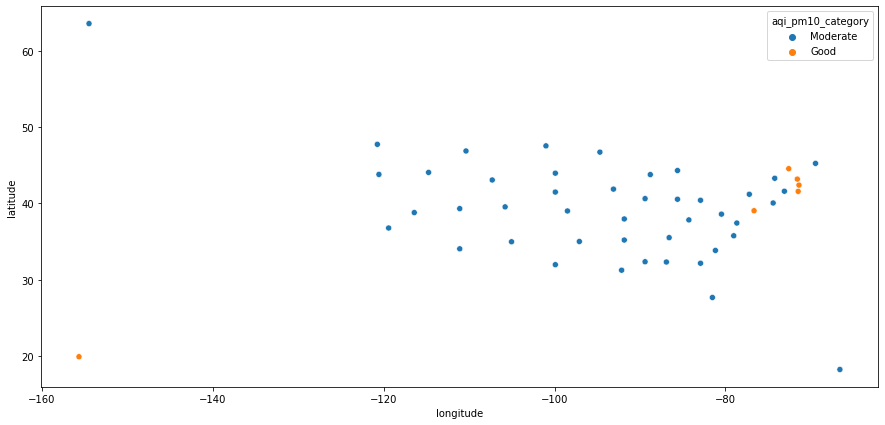



AQI map for Particulate Matter 10 (PM10) by month : 5


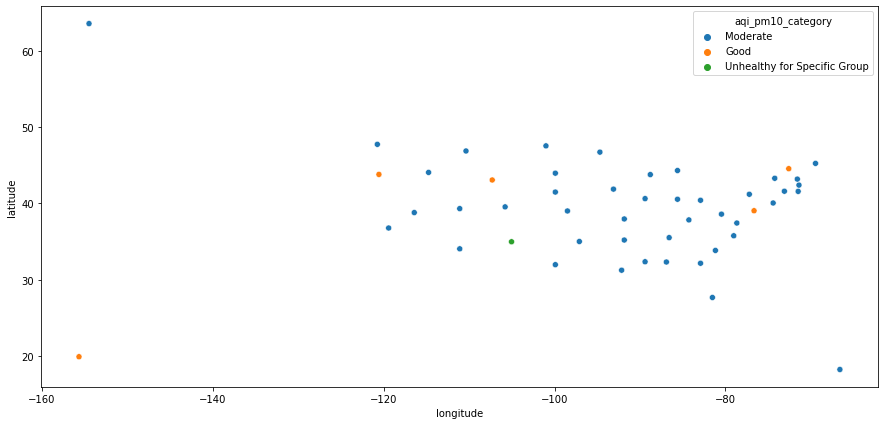



AQI map for Particulate Matter 10 (PM10) by month : 6


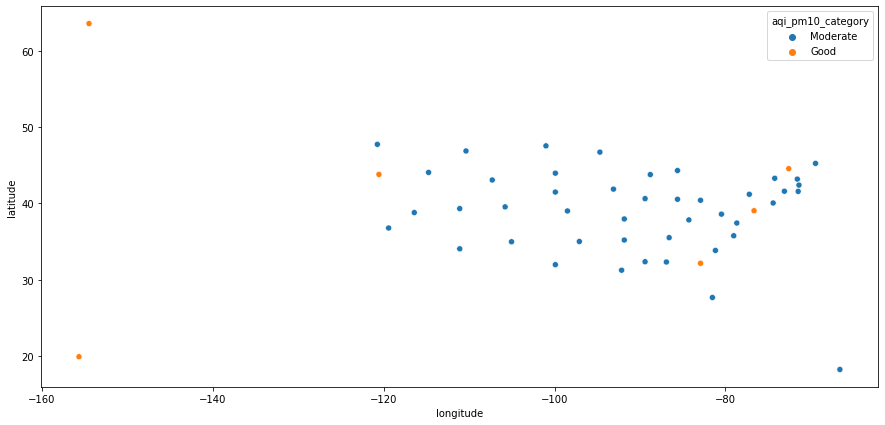



AQI map for Particulate Matter 10 (PM10) by month : 7


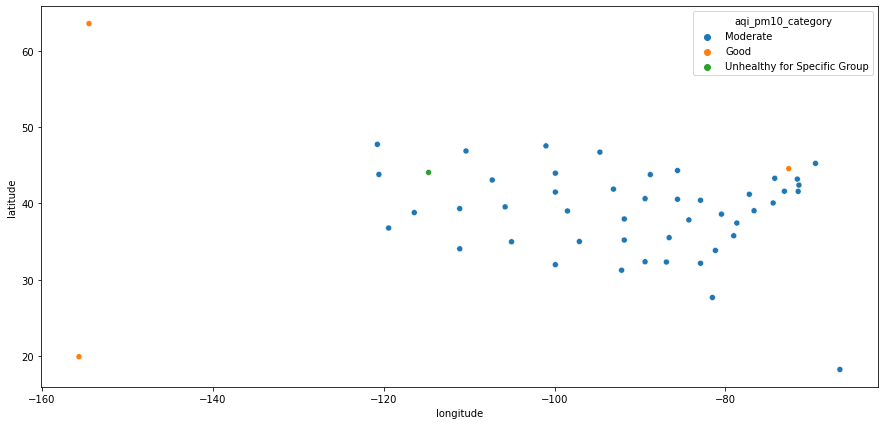



AQI map for Particulate Matter 10 (PM10) by month : 8


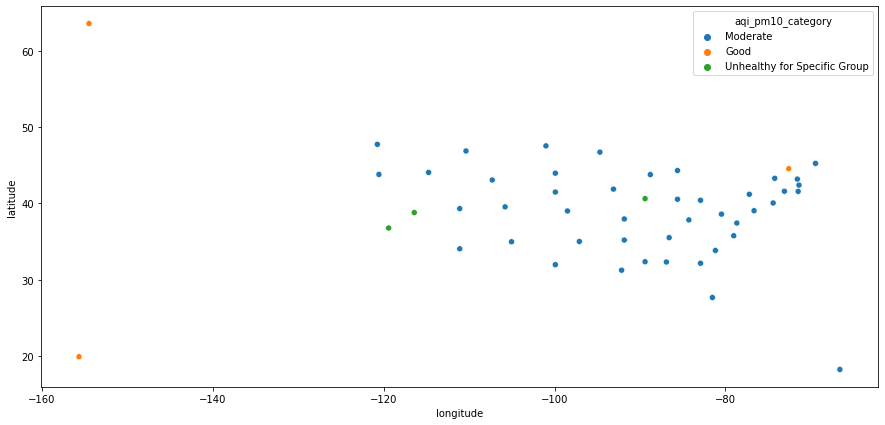



AQI map for Particulate Matter 10 (PM10) by month : 9


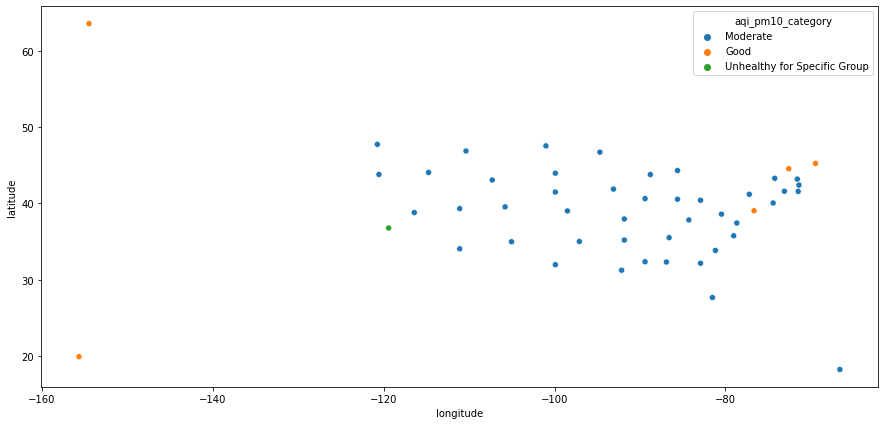



AQI map for Particulate Matter 10 (PM10) by month : 10


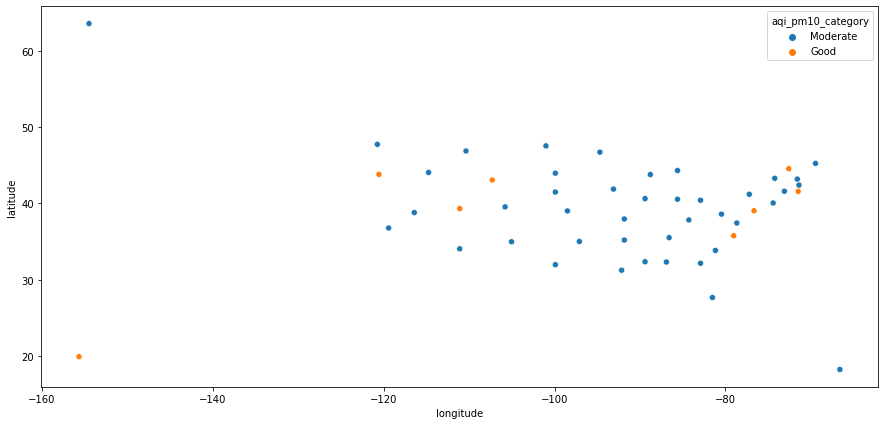



AQI map for Particulate Matter 10 (PM10) by month : 11


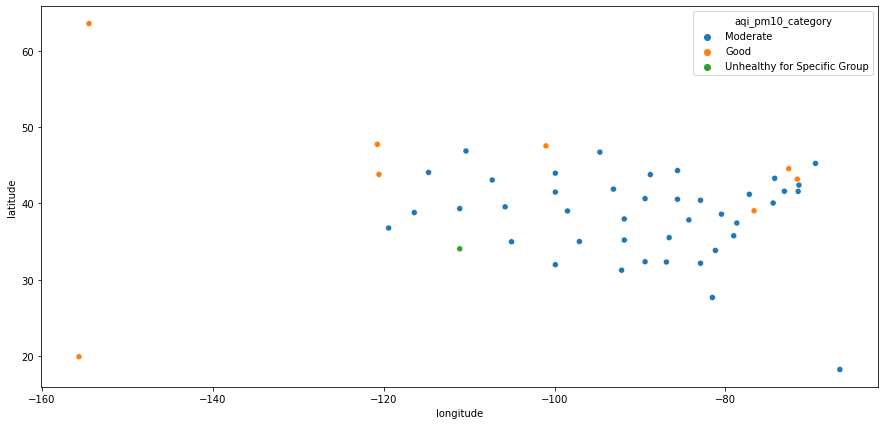



AQI map for Particulate Matter 10 (PM10) by month : 12


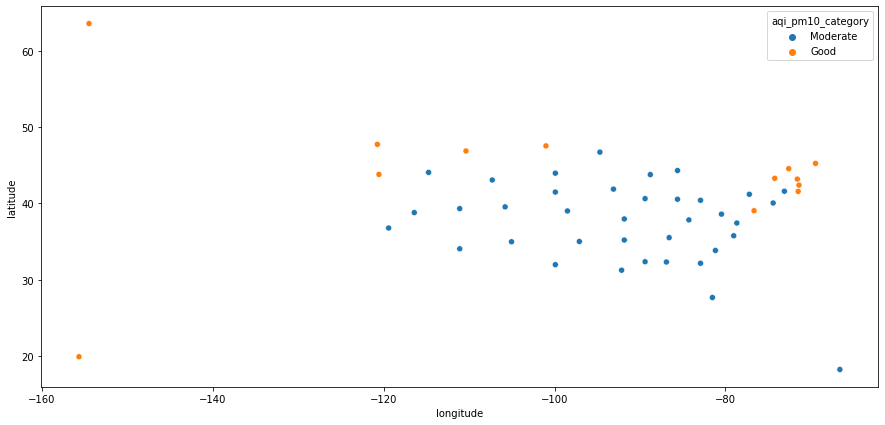

In [250]:
col = 1
while col <= 12:
    print(f'AQI map for Particulate Matter 10 (PM10) by month : {col}')
    sns.scatterplot(data=pm10_mean_monthly[(pm10_mean_monthly['month'] == col)],x='longitude',y='latitude',hue='aqi_pm10_category')
    plt.show()
    print('\n')
    col = col+1

#### PM25 AQI Monthly Categories 

In [251]:
pm25_aqi_category = []
for em in range(len(pm25_mean_monthly )):
    pm25_category_scan = category(pm25_mean_monthly .loc[em,'aqi_pm25'])
    pm25_aqi_category.append(pm25_category_scan)

pm25_mean_monthly ['aqi_pm25_category'] = pm25_aqi_category


In [252]:
pm25_mean_monthly

,state_name,year,month,longitude,latitude,aqi_pm25,aqi_pm25_category
0,Alabama,2021,1,-86.902298,32.318231,35.196710,Unhealthy for Specific Group
1,Alabama,2021,2,-86.902298,32.318231,36.946103,Unhealthy for Specific Group
2,Alabama,2021,3,-86.902298,32.318231,38.800000,Unhealthy for Specific Group
3,Alabama,2021,4,-86.902298,32.318231,41.806918,Unhealthy for Specific Group
4,Alabama,2021,5,-86.902298,32.318231,38.530876,Unhealthy for Specific Group
...,...,...,...,...,...,...,...
418,Wyoming,2021,1,-107.290284,43.075968,2.840909,Good
419,Wyoming,2021,2,-107.290284,43.075968,3.407407,Good
420,Wyoming,2021,3,-107.290284,43.075968,6.116667,Good
421,Wyoming,2021,4,-107.290284,43.075968,8.991667,Good


Result for AQI category for PM2.5 are at 'aqi_pm25_category' column. Another plotting see the plots below.

AQI map for Particulate Matter 2.5 (PM2.5) by month : 1


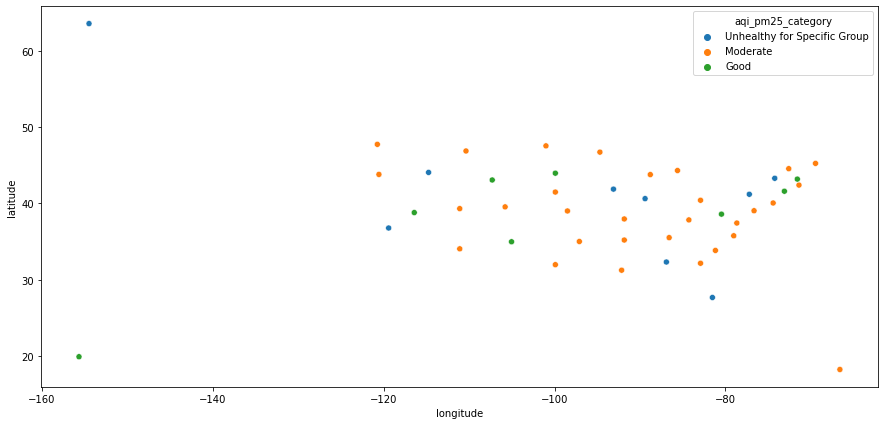



AQI map for Particulate Matter 2.5 (PM2.5) by month : 2


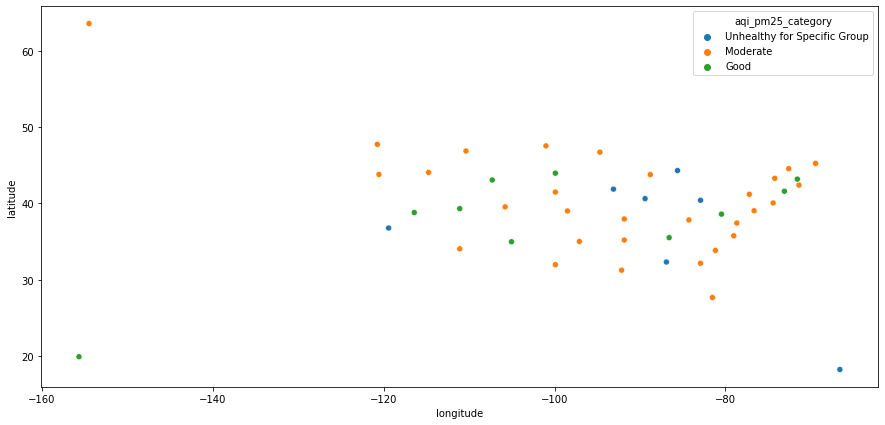



AQI map for Particulate Matter 2.5 (PM2.5) by month : 3


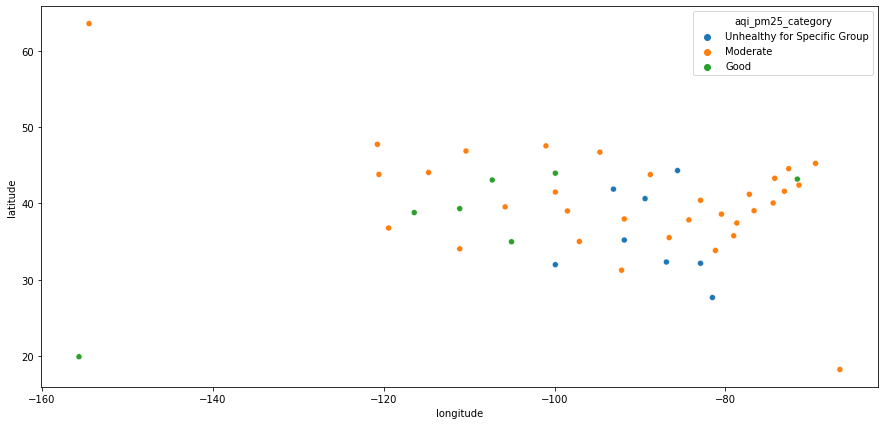



AQI map for Particulate Matter 2.5 (PM2.5) by month : 4


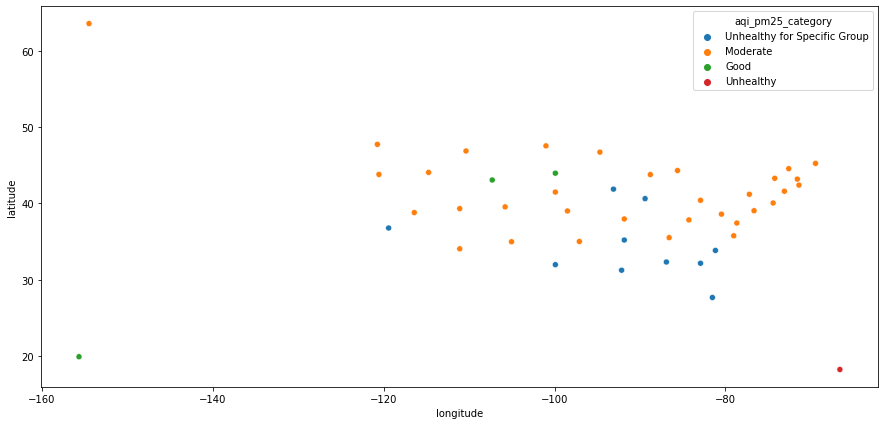



AQI map for Particulate Matter 2.5 (PM2.5) by month : 5


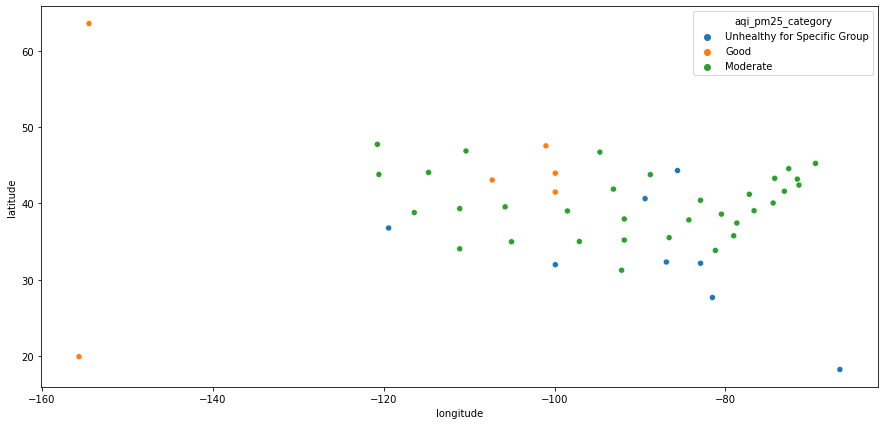



AQI map for Particulate Matter 2.5 (PM2.5) by month : 6


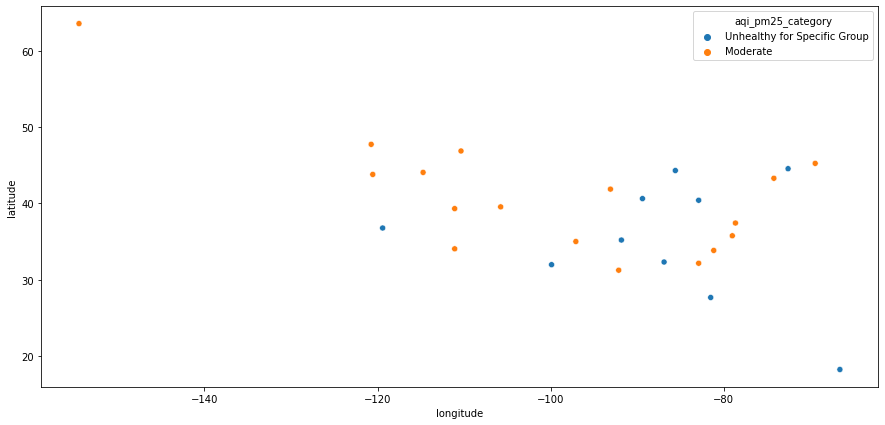



AQI map for Particulate Matter 2.5 (PM2.5) by month : 7


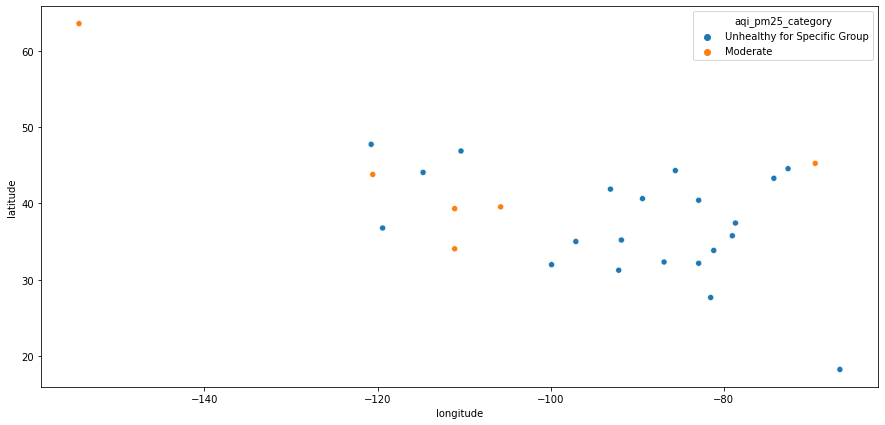



AQI map for Particulate Matter 2.5 (PM2.5) by month : 8


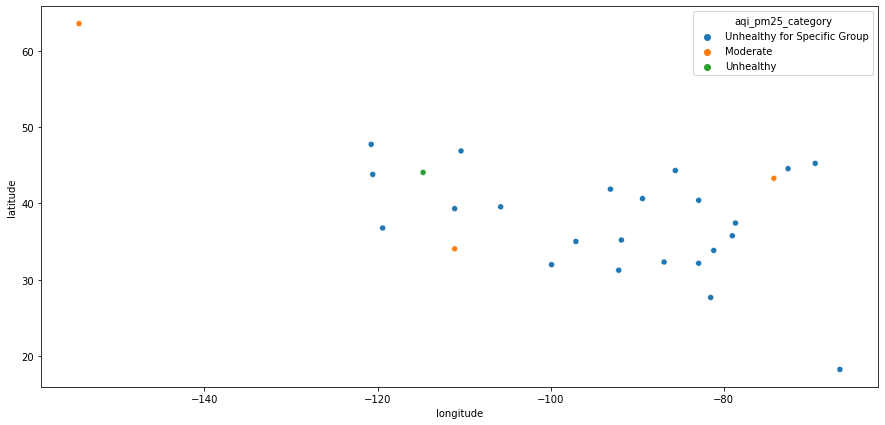



AQI map for Particulate Matter 2.5 (PM2.5) by month : 9


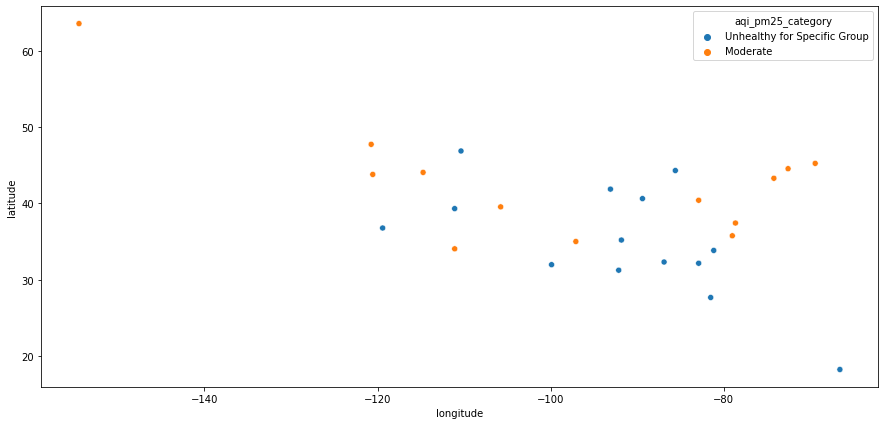



AQI map for Particulate Matter 2.5 (PM2.5) by month : 10


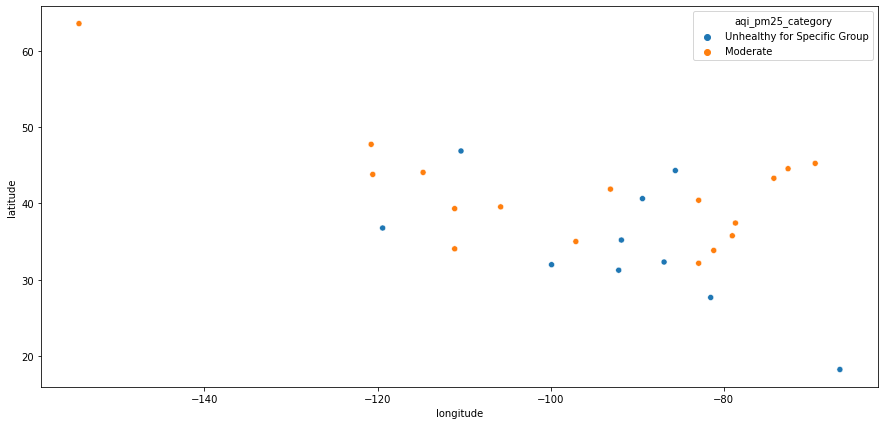



AQI map for Particulate Matter 2.5 (PM2.5) by month : 11


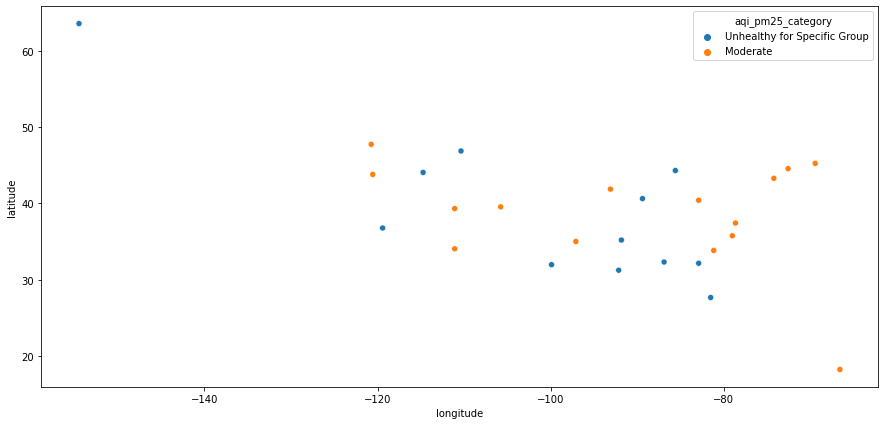



AQI map for Particulate Matter 2.5 (PM2.5) by month : 12


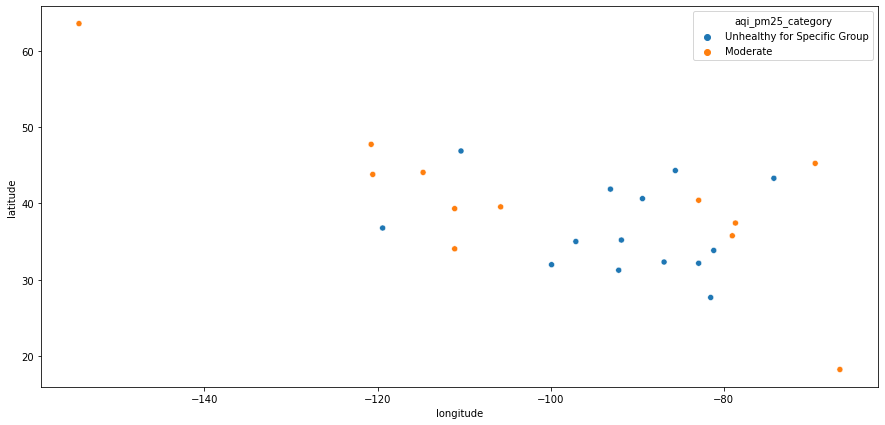

In [253]:
col = 1
while col <= 12:
    print(f'AQI map for Particulate Matter 2.5 (PM2.5) by month : {col}')
    sns.scatterplot(data=pm25_mean_monthly[(pm25_mean_monthly['month'] == col)],x='longitude',y='latitude',hue='aqi_pm25_category')
    plt.show()
    print('\n')
    col = col+1

In [254]:
o3 = o3[['state_name', 'date_local', 'week','month','year','longitude', 'latitude','aqi_o3']]
pm10 = pm10[['state_name', 'date_local', 'week','month','year','longitude', 'latitude','aqi_pm10']]
pm25 = pm25[['state_name', 'date_local', 'week','month','year','longitude', 'latitude','aqi_pm25']]

Based on the all category only few being category as good. The category range even reaching unhealthy for all living thing at the PM2.5. So we know our current air condition is almost critical.

### 5. Is there a significant decrease or increase of daily AQI average in January 2021 and December 2021 for each Air Emission in entire US?

Over time we will find out did those air emissions get worse in the previous year or are they getting better? If so, is the difference very steep or not which will be very influential for the  air quality (as warning or cautions). We will find out with a testing method.

This method will be carried out with One Sample Two Tailed Hypothesis testing where the same variable will be compared to find its significance. The steps are that we look for the average AQI related to the first and last months of 2021, then we test each AQI with the selected Hypothesis testing method.

#### Testing for O3

Define all the daily AQI at December

In [255]:
O3daily_Dec = pd.DataFrame(o3[(o3['month'] == 12)]['aqi_o3'])
O3daily_Dec


,aqi_o3
334,25.000000
335,17.500000
336,17.500000
337,20.500000
338,31.000000
...,...
18476,19.722222
18477,21.222222
18478,16.055556
18479,10.222222


Find out the average AQI at January 2021.

In [256]:
o3_test = pd.DataFrame(o3.groupby(by=['month'])['aqi_o3'].mean())
o3_0 = o3_test.iloc[0,0]
o3_0

28.241722971523245

Find out the average AQI at December 2021.

In [257]:
o3_1 = o3_test.iloc[11,0]
o3_1

27.701432843071743

The average of O3 AQI daily is 28.241 during the first month, then the  AQI reach 27.70 monthly on average. Is it decrease significally?

Obtainig the P-Value:

**H0: μ = 28.241**

**H1: μ != 28.241**

In [258]:
t_stat,p_val = stats.ttest_1samp(O3daily_Dec['aqi_o3'], o3_0) #500 = kondisi idealnya
print('P-value:',p_val) #p-val tidak dibagi 2, CI nya 0.95
print('t-statistics:',t_stat)

P-value: 0.0006074308510359762
t-statistics: -3.4353623437197895


Result of Hypothesis :

In [259]:
if p_val < 0.05:
    print('Reject H0, Accept H1 = There there is a significant difference.')
else:
    print('Failed to Reject H0, Accept H0 = There is no significant difference.')


Reject H0, Accept H1 = There there is a significant difference.


The Graph of Hypothesis Testing Interval for O3.

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


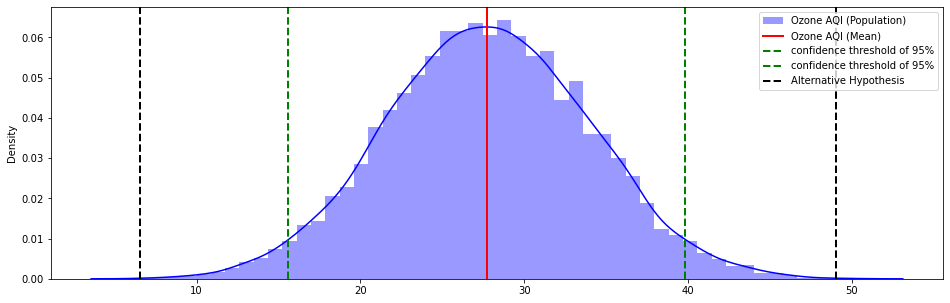

In [260]:
O3daily_Dec_pop = np.random.normal(O3daily_Dec['aqi_o3'].mean(), O3daily_Dec['aqi_o3'].std(), 10000)

ci = stats.norm.interval(0.95, O3daily_Dec['aqi_o3'].mean(), O3daily_Dec['aqi_o3'].std())

plt.figure(figsize=(16,5))
sns.distplot(O3daily_Dec_pop, label='Ozone AQI (Population)', color='blue')
plt.axvline(O3daily_Dec['aqi_o3'].mean(), color='red', linewidth=2, label='Ozone AQI (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(O3daily_Dec_pop.mean() + t_stat*O3daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(O3daily_Dec_pop.mean() - t_stat*O3daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

So we reject the null Hypothesis

#### Testing for PM10

The Graph of Hypothesis Testing Interval for O3.

In [261]:
PM10daily_Dec = pd.DataFrame(pm10[(pm10['month'] == 12)]['aqi_pm10'])
PM10daily_Dec

,aqi_pm10
334,29.437500
335,29.144578
336,29.755556
337,24.023810
338,21.059524
...,...
16147,38.500000
16148,17.190476
16150,16.052632
16151,26.409091


Find out the average AQI at January 2021.

In [262]:
pm10_test = pd.DataFrame(pm10.groupby(by=['month'])['aqi_pm10'].mean())
pm10_0 = pm10_test.iloc[0,0]
pm10_0

13.487857543382567

Find out the average AQI at December 2021

In [263]:
pm10_1 = pm10_test.iloc[11,0]
pm10_1

15.216536627831033

The average of PM10 AQI daily is 113.487 during the first month, then the  AQI reach 15.216 monthly on average. Is it increase significally?

**H0: μ = 13.487**

**H1: μ != 113.487**


Obtainig the P-Value:

In [264]:
t_stat,p_val = stats.ttest_1samp(PM10daily_Dec['aqi_pm10'], pm10_0)
print('P-value:',p_val) #p-val tidak dibagi 2, CI nya 0.95
print('t-statistics:',t_stat)


P-value: 1.4273236327686578e-15
t-statistics: 8.081067865415177


Result of Hypothesis :

In [265]:
if p_val < 0.05:
    print('Reject H0, Accept H1 = There there is a significant difference.')
else:
    print('Failed to Reject H0, Accept H0 = There is no significant difference.')


Reject H0, Accept H1 = There there is a significant difference.


/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


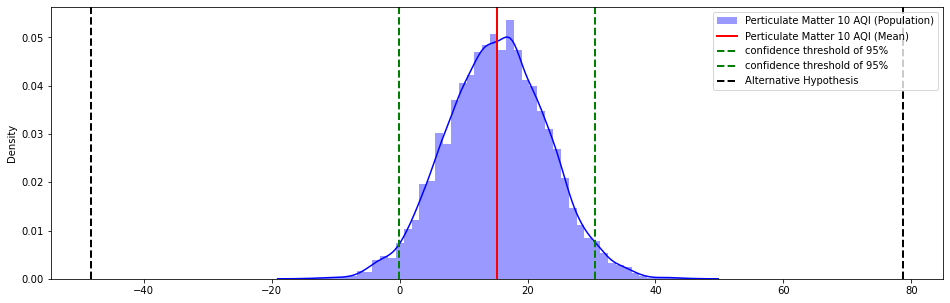

In [266]:
PM10daily_Dec_pop = np.random.normal(PM10daily_Dec['aqi_pm10'].mean(), PM10daily_Dec['aqi_pm10'].std(), 10000)

ci = stats.norm.interval(0.95, PM10daily_Dec['aqi_pm10'].mean(), PM10daily_Dec['aqi_pm10'].std())

plt.figure(figsize=(16,5))
sns.distplot(PM10daily_Dec_pop, label='Perticulate Matter 10 AQI (Population)', color='blue')
plt.axvline(PM10daily_Dec['aqi_pm10'].mean(), color='red', linewidth=2, label='Perticulate Matter 10 AQI (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(PM10daily_Dec_pop.mean() + t_stat*PM10daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(PM10daily_Dec_pop.mean() - t_stat*PM10daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()


#### Testing for PM2.5

Define all the daily AQI at December

In [267]:
PM25daily_Dec = pd.DataFrame(pm25[(pm25['month'] == 12)]['aqi_pm25'])
PM25daily_Dec

,aqi_pm25
334,61.857143
335,56.000000
336,66.285714
337,62.857143
338,46.857143
...,...
10298,10.666667
10299,8.000000
10300,25.000000
10301,20.333333


Find out the average AQI at January 2021.

In [268]:
pm25_test = pd.DataFrame(pm25.groupby(by=['month'])['aqi_pm25'].mean())
pm25_0 = pm25_test.iloc[0,0]
pm25_0


24.44249235238809

Find out the average AQI at December 2021.

In [269]:
pm25_1 = pm25_test.iloc[11,0]
pm25_1

29.358844508801614

The average of PM25 AQI daily is 24.442 during the first month, then the  AQI reach 329.358 monthly on average. Is it decrease significally?

**H0: μ = 24.442**

**H1: μ != 24.442**


Obtainig the P-Value:

In [270]:
t_stat,p_val = stats.ttest_1samp(PM25daily_Dec['aqi_pm25'], pm25_0) #500 = kondisi idealnya
print('P-value:',p_val) #p-val tidak dibagi 2, CI nya 0.95
print('t-statistics:',t_stat)


P-value: 7.009770974656077e-26
t-statistics: 10.908824453786938


Result of Hypothesis :

In [271]:
if p_val < 0.05:
    print('Reject H0, Accept H1 = There there is a significant difference.')
else:
    print('Failed to Reject H0, Accept H0 = There is no significant difference.')

Reject H0, Accept H1 = There there is a significant difference.


The Graph of Hypothesis Testing Interval for PM25.

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


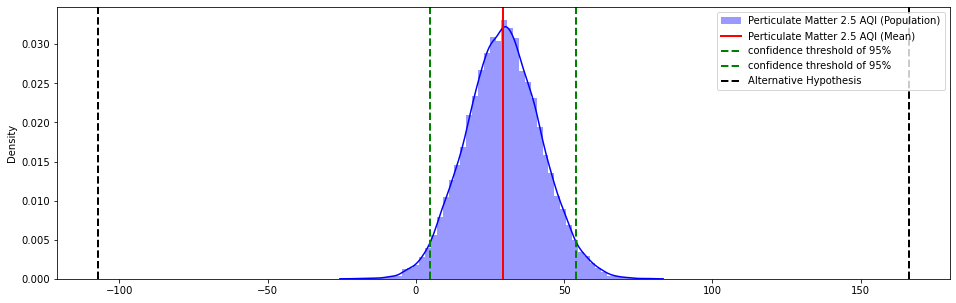

In [272]:
PM25daily_Dec_pop = np.random.normal(PM25daily_Dec['aqi_pm25'].mean(), PM25daily_Dec['aqi_pm25'].std(), 25000)

ci = stats.norm.interval(0.95, PM25daily_Dec['aqi_pm25'].mean(), PM25daily_Dec['aqi_pm25'].std())

plt.figure(figsize=(16,5))
sns.distplot(PM25daily_Dec_pop, label='Perticulate Matter 2.5 AQI (Population)', color='blue')
plt.axvline(PM25daily_Dec['aqi_pm25'].mean(), color='red', linewidth=2, label='Perticulate Matter 2.5 AQI (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(PM25daily_Dec_pop.mean() + t_stat*PM25daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(PM25daily_Dec_pop.mean() - t_stat*PM25daily_Dec_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()


So the result we get are :
- O3 = There there is a significant difference.
- PM10 = There there is a significant difference.
- PM25 = There there is a significant difference.

For the last month, O3 AQI are decreasing from early year while the others emmisions are increasing. Even so, O3 had the highest AQI in the middle of the year. Beside O3 need to pay attention to these emissions and their future impacts. It also needs to be notified to the public or the company if this is still being done, the chances of AQI will be higher. Activities In those months that cause high emissions need to be minimized. `

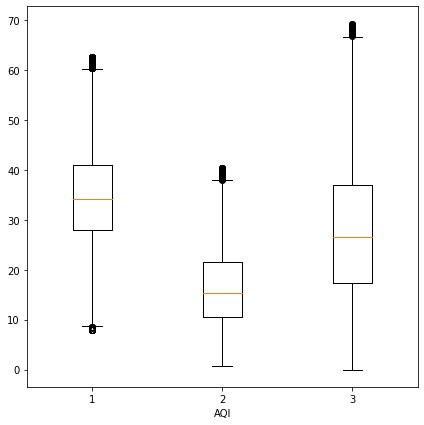

In [273]:
plt.rcParams["figure.figsize"] = (7,7)
plt.boxplot([o3['aqi_o3'], pm10['aqi_pm10'], pm25['aqi_pm25']], vert=True)
plt.xlabel('AQI')
plt.show()

In [274]:
pm25['aqi_pm25'].std()

14.044286453893152

### 6. Which are the most important emissions to notice at this time?

See the history from the graph at number 1.

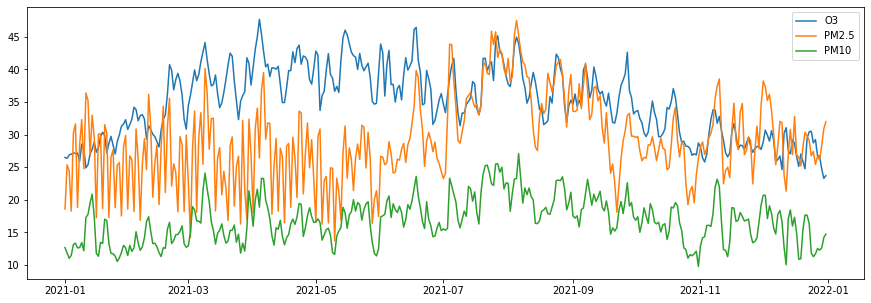

In [275]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(o3.groupby(by='date_local')['aqi_o3'].mean(), label = "O3")
plt.plot(pm25.groupby(by='date_local')['aqi_pm25'].mean(), label = "PM2.5")
plt.plot(pm10.groupby(by='date_local')['aqi_pm10'].mean(), label = "PM10")
plt.legend()
plt.show()

We can obtain he most important emissions to notice at this time by see the histrory of all emission at 2021 from the graph above. The graph above shows the AQI but it is still the average daily AQI. Every day the air emission rating can change at any time, for that later we will average it over a year to find out what the current rating of each emission is.

Create the table of each emission average(mean) in 2021.

In [276]:
aqi_overal_mean_per_em = pd.DataFrame(columns=["emission","overal_mean"], data=[['O3', o3['aqi_o3'].mean()],['PM10',pm10['aqi_pm10'].mean()], ['PM2.5',pm25['aqi_pm25'].mean()]])

In [277]:
aqi_overal_mean_per_em.set_index('emission', inplace = True)

Rank them in a form of bar. 

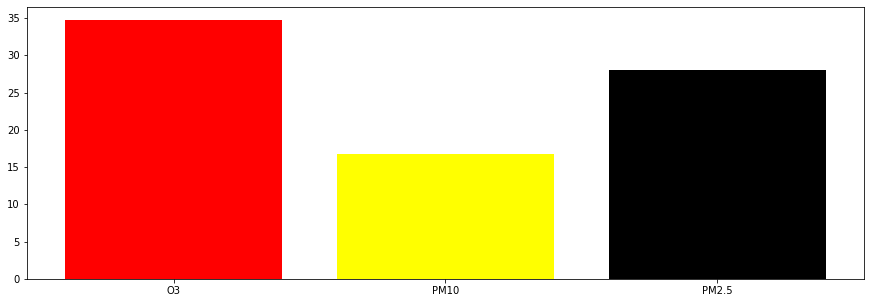

In [278]:
#bar plot
plt.bar(aqi_overal_mean_per_em.index, height= aqi_overal_mean_per_em['overal_mean'] ,color = ['red', 'yellow', 'black'])
plt.show()

So if we determine the most highest emission at this based on the last year AQI average, the result from tha highest are Ozone(O3), Particulate Matter 2.5(PM2.5), and Particulate Matter 2.510(PM10). But if we want to determined based on tha last month :


In [279]:
aqi_dec_mean_per_em = pd.DataFrame(columns=["emission","overal_mean"], data=[['O3', O3daily_Dec['aqi_o3'].mean()],['PM10',PM10daily_Dec['aqi_pm10'].mean()], ['PM2.5',PM25daily_Dec['aqi_pm25'].mean()]])
aqi_dec_mean_per_em.set_index('emission', inplace = True)

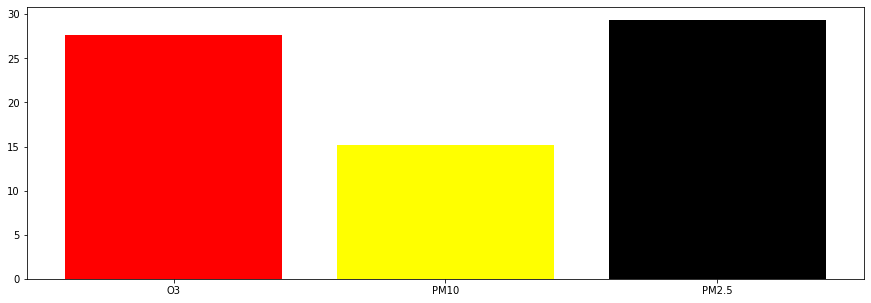

In [280]:
plt.bar(aqi_dec_mean_per_em.index, height= aqi_dec_mean_per_em['overal_mean'] ,color = ['red', 'yellow', 'black'])
plt.show()

The order are change between O3 and PM2.5 while PM10 still at the last. So in here we can conclude because of the different result, we still must keep paying attention to these two emissions. Means, in the future, regulation to decrease O3 and PM 2.5 must equally become priority.

###  7. Which state need the most regulation for now regarding each emission?

Rank the state which has the highest AQI of each emission. If we want to find the AQI of overall average in a year, pay attention to the table below.

In [281]:
highest_AQI_overall_per_state = pd.DataFrame(o3.groupby(by='state_name')['aqi_o3'].mean())
hoa10ps = pd.DataFrame(pm10.groupby(by='state_name')['aqi_pm10'].mean())
hoa25ps = pd.DataFrame(pm25.groupby(by='state_name')['aqi_pm25'].mean())
highest_AQI_overall_per_state['aqi_pm10'] = hoa10ps['aqi_pm10']
highest_AQI_overall_per_state['aqi_pm25'] = hoa25ps['aqi_pm25']


In [282]:
highest_AQI_overall_per_state.sort_values(by = 'aqi_o3', ascending=False).head()

,aqi_o3,aqi_pm10,aqi_pm25
state_name,,,
Arizona,44.586378,25.248643,24.434507
New Mexico,42.617095,24.741345,11.811391
Colorado,42.602632,18.514310,20.184264
Wyoming,41.618894,15.188853,5.900327
Nevada,41.571789,21.517327,6.830000


In [283]:
highest_AQI_overall_per_state.sort_values(by = 'aqi_pm10', ascending=False).head()

,aqi_o3,aqi_pm10,aqi_pm25
state_name,,,
Illinois,35.176519,26.074155,39.793802
Arizona,44.586378,25.248643,24.434507
New Mexico,42.617095,24.741345,11.811391
California,40.862838,23.203399,36.741865
Iowa,33.946724,21.795222,33.973137


In [284]:
highest_AQI_overall_per_state.sort_values(by = 'aqi_pm25', ascending=False).head()

,aqi_o3,aqi_pm10,aqi_pm25
state_name,,,
Illinois,35.176519,26.074155,39.793802
Puerto Rico,19.559190,20.905267,38.248311
Alabama,33.060263,17.493505,38.147162
Michigan,34.584090,16.847004,37.119118
California,40.862838,23.203399,36.741865


In the Bar Chart form, we can visualize each of the result.

Highest Overall AQI for O3.

In [285]:
x0 = pd.DataFrame(highest_AQI_overall_per_state['aqi_o3']).sort_values(by = 'aqi_o3', ascending=False).iloc[:,0].head()
x = x0.to_list()

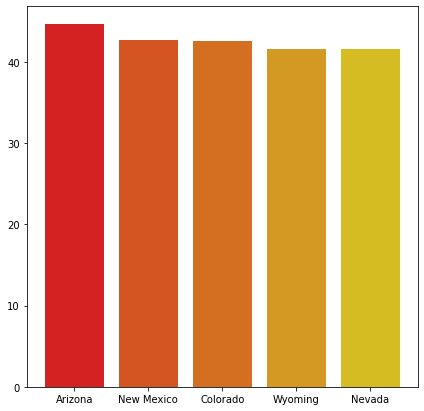

In [286]:

plt.rcParams["figure.figsize"] = (7,7)
plt.bar(x0.index.to_list(), height= x ,color = ['#d42222', '#d45422', '#d46f22', '#d49922', '#d4bc22'])
plt.show()

Highest Overall AQI for PM10.

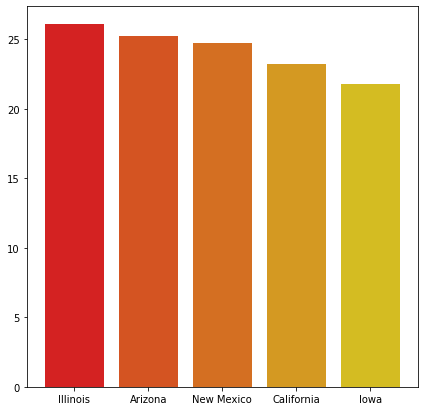

In [287]:
y0 = pd.DataFrame(highest_AQI_overall_per_state['aqi_pm10']).sort_values(by = 'aqi_pm10', ascending=False).iloc[:,0].head()
y = y0.to_list()

plt.rcParams["figure.figsize"] = (7,7)
plt.bar(y0.index.to_list(), height= y ,color = ['#d42222', '#d45422', '#d46f22', '#d49922', '#d4bc22'])
plt.show()

Highest Overall AQI for PM2.5.

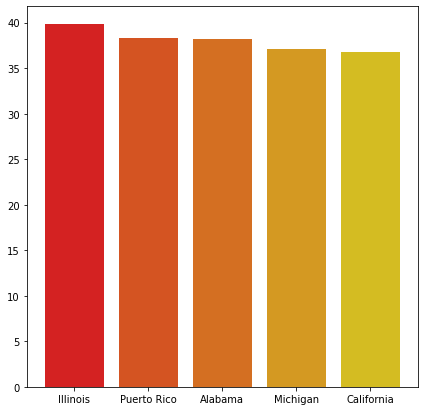

In [288]:
z0 = pd.DataFrame(highest_AQI_overall_per_state['aqi_pm25']).sort_values(by = 'aqi_pm25', ascending=False).iloc[:,0].head()
z = z0.to_list()

plt.rcParams["figure.figsize"] = (7,7)
plt.bar(z0.index.to_list(), height= z ,color = ['#d42222', '#d45422', '#d46f22', '#d49922', '#d4bc22'])
plt.show()

By that means if we want to apply the regulation based on the top 5, top 4, top 3, top2, orr top 1 :
- For the highest O3, we have Arizona, followed by New Mexico, Colorado, Wyoming, Nevada.
- For the highest PM10, we have Ilinois, followed by Ilinois, Arizona, New Mexico, Californoia, Iowa.
- For the highest PM2.5, we have Puerto Rico, followed by Illinois, Puerto Rico, Alabama, Michigan, and California..

There are several states such as Arizona, New Mexico, Illinois, and California that are in the top 5 in both types of emissions.So these states which included in the top 5 must be included for regulations. 

## III. Conclusion

To answer the folllowing problem :
1. Can the data be processed without an anomalous data?
`Yes, simply need getting rid the outlier by delete any extreme outlier`
2. What are the current top three Air Quality Index (AQI) like in entire US for last 1 year? What are the average AQI per day wich make the US air condition in that situation ?
`Based on observation, O3 could be more or similiar with PM2.5 while PM10 rarely compete with both of air emissions.`
3. What is the AQI limit for determining high, medium, or low air emissions in the U.S.?
`- The O3 consider Low in US if the O3 less than  28.28169014084508`
`- The O3 consider medium in US if the O3 in between  28.28169014084508  and  42.0`
`- The O3 consider High in US if the O3 more than  42.0`
`- The PM10 consider Low in US if the O3 less than  10.75`
`- The PM10 consider medium in US if the O3 in between  10.75  and  22.6`
`- The PM10 consider High in US if the O3 more than  22.6`
`- The PM2.5 consider Low in US if the O3 less than  17.5`
`- The PM2.5 consider medium in US if the O3 in between  17.5  and  38.25`
`- The PM2.5 consider High in US if the O3 more than  38.25`
4. Based on the AQI parameters, What are the AQI categories in each state for every month?
`Based on the all category only few being category as good. The category range even reaching unhealthy for all living thing at the PM2.5. So we know our current air condition is almost critical.`
5. Is there any significant difference of daily AQI average in January 2021 and December 2021 for each Air Emission in entire US?
`For the last month, O3 AQI are decreasing from early year while the others emmisions are increasing. Even so, O3 had the highest AQI in the middle of the year. Beside O3 need to pay attention to these emissions and their future impacts. It also needs to be notified to the public or the company if this is still being done, the chances of AQI will be higher. Activities In those months that cause high emissions need to be minimized. `
6. Which are the most important emissions to notice at this time?
`So if we determine the most highest emission at this based on the last year AQI average, the result from tha highest are Ozone(O3), Particulate Matter 2.5(PM2.5), and Particulate Matter 2.510(PM10). But if we want to determined based on tha last month .`
`The order are change between O3 and PM2.5 while PM10 still at the last. So in here we can conclude because of the different result, we still must keep paying attention to these two emissions. Means, in the future, regulation to decrease O3 and PM 2.5 must equally become priority.`
7. Which state need the most regulation for now regarding the AQI average in each emission?
`By that means if we want to apply the regulation based on the top 5, top 4, top 3, top2, orr top 1 :`
`- For the highest O3, we have Arizona, followed by New Mexico, Colorado, Wyoming, Nevada.`
`- For the highest PM10, we have Ilinois, followed by Ilinois, Arizona, New Mexico, Californoia, Iowa.`
`- For the highest PM2.5, we have Puerto Rico, followed by Illinois, Puerto Rico, Alabama, Michigan, and California.`
`There are several states such as Arizona, New Mexico, Illinois, and California that are in the top 5 in both types of emissions.So these states which included in the top 5 must be included for regulations. `

Ozone (O3) and Particulate Matter 2.5 (PM2.5) are the most critical emissions today. Making regulations is very necessary because there are significant differences in each emission in January and December. Because regulations cannot be applied to all states, we simply make regulations regarding restrictions on the use of motorized vehicles in all the top 5 major emissions of Ozone (O3) and Particulate Matter 2.5 (PM2.5) respectively Arizona, New Mexico, Colorado, Wyoming , Nevada, Illinois, Puerto Rico, Alabama, Michigan, and California. Or top 3, top 2, top 1 according to the needs and agreements of each governor. Arizona, New Mexico, Illinois, and California that are in the top 5 which included in 2 of emissions also can be a consideration related to the regulation.